In [1]:
from sqlalchemy import create_engine
import pandas as pd

from data_generator.main import DiscriminationData
from path import HERE

DB_PATH = HERE.joinpath('experiments/discrimination_detection_results11.db')
conn = create_engine(f'sqlite:///{DB_PATH}')
query = """
with s1 as (SELECT ex.experiment_id,
                   am.analysis_id,
                   am.method_name,
                   ex.status,
                   er.group_key,

                   json_extract(ex.config, '$.aequitas_global_iteration_limit') as aequitas_global_iteration_limit,
                   json_extract(ex.config, '$.aequitas_local_iteration_limit')  as aequitas_local_iteration_limit,
                   json_extract(ex.config, '$.aequitas_model_type')             as aequitas_model_type,
                   json_extract(ex.config, '$.aequitas_perturbation_unit')      as aequitas_perturbation_unit,
                   json_extract(ex.config, '$.aequitas_threshold')              as aequitas_threshold,
                   json_extract(ex.config, '$.bias_scan_favorable_value')       as bias_scan_favorable_value,
                   json_extract(ex.config, '$.bias_scan_mode')                  as bias_scan_mode,
                   json_extract(ex.config, '$.bias_scan_n_estimators')          as bias_scan_n_estimators,
                   json_extract(ex.config, '$.bias_scan_num_iters')             as bias_scan_num_iters,
                   json_extract(ex.config, '$.bias_scan_random_state')          as bias_scan_random_state,
                   json_extract(ex.config, '$.bias_scan_scoring')               as bias_scan_scoring,
                   json_extract(ex.config, '$.bias_scan_test_size')             as bias_scan_test_size,
                   json_extract(ex.config, '$.expga_max_global')                as expga_max_global,
                   json_extract(ex.config, '$.expga_max_local')                 as expga_max_local,
                   json_extract(ex.config, '$.expga_threshold')                 as expga_threshold,
                   json_extract(ex.config, '$.expga_threshold_rank')            as expga_threshold_rank,
                   json_extract(ex.config, '$.max_group_size')                  as max_group_size,
                   json_extract(ex.config, '$.max_number_of_classes')           as max_number_of_classes,
                   json_extract(ex.config, '$.min_number_of_classes')           as min_number_of_classes,
                   json_extract(ex.config, '$.mlcheck_iteration_no')            as mlcheck_iteration_no,
                   json_extract(ex.config, '$.nb_attributes')                   as nb_attributes,
                   json_extract(ex.config, '$.nb_categories_outcome')           as nb_categories_outcome,
                   json_extract(ex.config, '$.nb_groups')                       as nb_groups,
                   json_extract(ex.config, '$.prop_protected_attr')             as prop_protected_attr,
                   json_extract(ex.config, '$.real_dataset_name')             as real_dataset_name,
                   json_extract(ex.config, '$.use_real_data')             as use_real_data,

                   CAST(er.calculated_aleatoric_group AS float)                 AS calculated_aleatoric,
                   CAST(er.calculated_epistemic_group AS float)                 AS calculated_epistemic,

                   CAST(er.calculated_granularity AS float)                     AS calculated_granularity,
                   CAST(er.calculated_group_size AS float)                      AS calculated_group_size,
                   CAST(er.calculated_intersectionality AS float)               AS calculated_intersectionality,
                   CAST(er.calculated_magnitude AS float)                       AS calculated_magnitude,
                   CAST(er.calculated_similarity AS float)                      AS calculated_similarity,
                   CAST(er.calculated_subgroup_ratio AS float)                  AS calculated_subgroup_ratio,
                   CAST(er.calculated_uncertainty_group AS float)                     AS calculated_uncertainty,

                   CAST(er.synthetic_group_size AS integer)                     AS synthetic_group_size,
                   CAST(er.nb_unique_indv AS integer)                           AS nb_unique_indv,

                   CAST(er.num_exact_couple_matches AS integer)                 AS num_exact_couple_matches,
                   CAST(er.num_new_group_couples AS integer)                    AS num_new_group_couples,
                   num_new_group_couples / CAST(nb_unique_indv AS FLOAT)        as prop_of_new_individuals_found,
                   num_exact_couple_matches / CAST(nb_unique_indv AS FLOAT)   as prop_of_orig_individuals_found


            FROM experiments ex
                     join main.analysis_metadata am on ex.experiment_id = am.experiment_id
                     left join main.evaluated_results er on am.analysis_id = er.analysis_id
            WHERE status = 'completed')
SELECT *
FROM s1
-- ORDER BY prop_of_new_individuals_found DESC 
"""

df = pd.read_sql_query(query, conn)
df = df.loc[:, ~df.T.duplicated()]
df

,experiment_id,analysis_id,method_name,status,group_key,aequitas_global_iteration_limit,aequitas_local_iteration_limit,aequitas_model_type,aequitas_perturbation_unit,aequitas_threshold,...,calculated_intersectionality,calculated_magnitude,calculated_similarity,calculated_subgroup_ratio,calculated_uncertainty,nb_unique_indv,num_exact_couple_matches,num_new_group_couples,prop_of_new_individuals_found,prop_of_orig_individuals_found
0,5c5f472d-4091-4390-a356-e4c01804fbea,4582f18f-344a-4137-ab76-f62203794a29,biasscan,completed,*|*|*|*|*|*|*|*|*|1|*|*|*|*|0-*|*|*|*|*|*|*|*|...,100,10,RandomForest,1.0,0.0,...,0.20,0.147838,0.000000,0.198948,0.174777,708,0,0,0.0,0.0
1,5c5f472d-4091-4390-a356-e4c01804fbea,4582f18f-344a-4137-ab76-f62203794a29,biasscan,completed,*|*|*|*|*|0|*|*|2|*|0|*|*|*|2-*|*|*|*|*|0|*|*|...,100,10,RandomForest,1.0,0.0,...,0.40,0.247976,0.250000,0.365392,0.180359,371,0,0,0.0,0.0
2,5c5f472d-4091-4390-a356-e4c01804fbea,4582f18f-344a-4137-ab76-f62203794a29,biasscan,completed,*|*|*|*|*|0|*|2|*|1|0|*|1|1|0-*|*|*|*|*|0|*|3|...,100,10,RandomForest,1.0,0.0,...,0.60,0.060691,0.285714,0.366457,0.164898,722,0,0,0.0,0.0
3,5c5f472d-4091-4390-a356-e4c01804fbea,4582f18f-344a-4137-ab76-f62203794a29,biasscan,completed,*|*|*|*|*|1|0|*|1|3|2|*|0|*|*-*|*|*|*|*|1|1|*|...,100,10,RandomForest,1.0,0.0,...,1.00,0.287647,0.166667,0.087207,0.176544,249,0,0,0.0,0.0
4,5c5f472d-4091-4390-a356-e4c01804fbea,4582f18f-344a-4137-ab76-f62203794a29,biasscan,completed,*|*|*|*|0|*|*|0|1|*|0|1|*|*|1-*|*|*|*|2|*|*|3|...,100,10,RandomForest,1.0,0.0,...,0.40,0.206564,0.000000,0.477279,0.187504,184,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38170,69f2d767-1c5b-4473-8640-02dee23773e5,fa92653a-2e71-4cde-a2c5-5fb5d612e173,mlcheck,completed,2|*|3|3|0|*|2|1-2|*|0|3|1|*|2|0,100,10,RandomForest,1.0,0.0,...,0.75,0.333784,0.500000,0.076904,0.161281,86,0,0,0.0,0.0
38171,69f2d767-1c5b-4473-8640-02dee23773e5,fa92653a-2e71-4cde-a2c5-5fb5d612e173,mlcheck,completed,2|1|*|*|1|3|1|*-0|0|*|*|2|0|1|*,100,10,RandomForest,1.0,0.0,...,0.50,0.335182,0.200000,0.208170,0.156125,134,0,0,0.0,0.0
38172,69f2d767-1c5b-4473-8640-02dee23773e5,fa92653a-2e71-4cde-a2c5-5fb5d612e173,mlcheck,completed,2|1|*|0|2|3|2|*-1|0|*|0|0|0|0|*,100,10,RandomForest,1.0,0.0,...,0.50,0.261399,0.166667,0.343679,0.174550,93,0,0,0.0,0.0
38173,69f2d767-1c5b-4473-8640-02dee23773e5,fa92653a-2e71-4cde-a2c5-5fb5d612e173,mlcheck,completed,2|1|*|3|*|*|2|1-1|0|*|2|*|*|0|0,100,10,RandomForest,1.0,0.0,...,0.50,0.284856,0.000000,0.299764,0.149239,114,0,0,0.0,0.0


In [26]:
df['prop_new_couples'] = df['num_new_group_couples'] / df['calculated_group_size']
df['prop_exact_couples'] = df['num_exact_couple_matches'] / df['calculated_group_size']

# Get unique methods
methods = df['method_name'].unique()

# Create summary for each method
method_summaries = []

for method in methods:
    method_df = df[df['method_name'] == method]
    
    # Basic statistics
    stats = {
        'Method': method,
        'Total Groups': len(method_df),
        'Mean New Couples': method_df['prop_new_couples'].mean(),
        'Median New Couples': method_df['prop_new_couples'].median(),
        'Non-zero New Couples': (method_df['prop_new_couples'] > 0).mean(),
        'Mean Exact Couples': method_df['prop_exact_couples'].mean(),
        'Median Exact Couples': method_df['prop_exact_couples'].median(),
        'Non-zero Exact Couples': (method_df['prop_exact_couples'] > 0).mean(),
    }
    
    # Add threshold statistics
    thresholds = [0.2, 0.4, 0.6, 0.8]
    for threshold in thresholds:
        new_key = f'New Couples {int(threshold*100)}%+'
        exact_key = f'Exact Couples {int(threshold*100)}%+'
        stats[new_key] = (method_df['prop_new_couples'] > threshold).mean()
        stats[exact_key] = (method_df['prop_exact_couples'] > threshold).mean()
    
    method_summaries.append(stats)

# Create DataFrame and format
summary_df = pd.DataFrame(method_summaries)
summary_df = summary_df.set_index('Method')

# Format numbers to 3 decimal places
for col in summary_df.columns:
    if col != 'Total Groups':
        summary_df[col] = summary_df[col].map('{:.3f}'.format)

# Reorder columns for better readability
column_order = [
    'Total Groups',
    'Mean New Couples',
    'Non-zero New Couples',
    'Mean Exact Couples',
    'Non-zero Exact Couples',
]
    
summary_df[column_order]

,Total Groups,Mean New Couples,Non-zero New Couples,Mean Exact Couples,Non-zero Exact Couples
Method,,,,,
biasscan,225,0.000,0.004,0.002,0.089
aequitas,18450,0.001,0.014,0.001,0.033
expga,18975,0.000,0.007,0.000,0.011
mlcheck,525,0.000,0.000,0.000,0.015


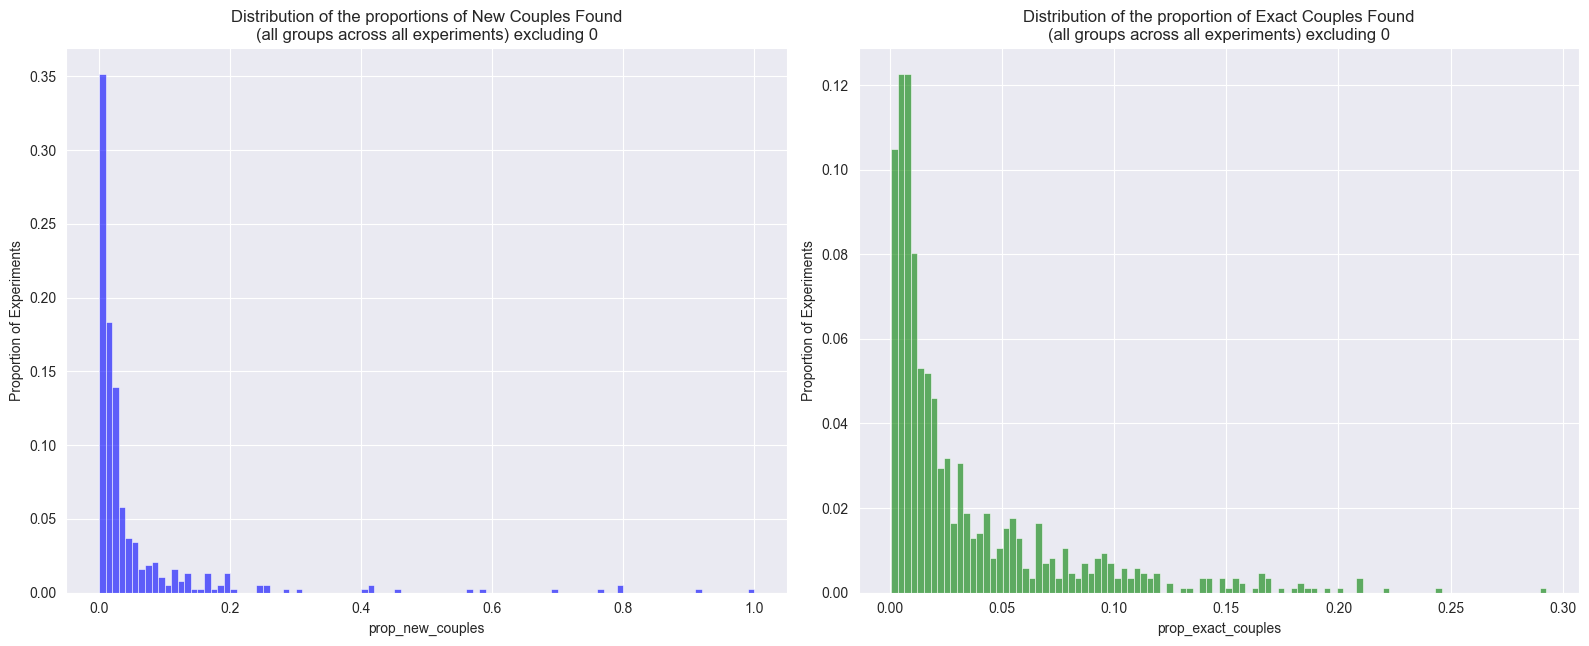

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate number of thresholds and adjust figure size accordingly
thresholds = [0, 0.2, 0.4, 0.6, 0.8]
n_thresholds = len(thresholds)
total_plots = 4 + 2 * n_thresholds  # 2 initial plots + 2 plots per threshold
n_rows = 4 + n_thresholds  # 2 rows for initial plots + 1 row per threshold

# Create figure and subplots
fig = plt.figure(figsize=(16, 6 * n_rows))
gs = fig.add_gridspec(n_rows, 2)

# First row: Raw distributions
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Calculate proportion of couples
df['prop_new_couples'] = df['num_new_group_couples'] / df['calculated_group_size']
df['prop_exact_couples'] = df['num_exact_couple_matches'] / df['calculated_group_size']

# # Plot 1: Raw distribution of new couples found
# sns.histplot(data=df, x='prop_new_couples', bins=100, ax=ax1, color='blue', alpha=0.6, stat="proportion")
# ax1.set_title('Distribution of the proportions of New Couples Found\n(all groups across all experiments)')
# ax1.set_ylabel('Proportion of Experiments')
# 
# # Plot 2: Raw distribution of exact couples found
# sns.histplot(data=df, x='prop_exact_couples', bins=100, ax=ax2, color='green', alpha=0.6, stat="proportion")
# ax2.set_title('Distribution of the proportion of Exact Couples Found\n(all groups across all experiments)')
# ax2.set_ylabel('Proportion of Experiments')

# Plot 3: Raw distribution of new couples found (excluding 0)
sns.histplot(data=df[df['prop_new_couples'] > 0], x='prop_new_couples', bins=100, ax=ax3,
             color='blue', alpha=0.6, stat="proportion")
ax3.set_title('Distribution of the proportions of New Couples Found\n(all groups across all experiments) excluding 0')
ax3.set_ylabel('Proportion of Experiments')

# Plot 4: Raw distribution of exact couples found (excluding 0)
sns.histplot(data=df[df['prop_exact_couples'] > 0], x='prop_exact_couples', bins=100, ax=ax4,
             color='green', alpha=0.6, stat="proportion")
ax4.set_title('Distribution of the proportion of Exact Couples Found\n(all groups across all experiments) excluding 0')
ax4.set_ylabel('Proportion of Experiments')


def df_new_couples_avg_calc(threshold):
    return df.groupby('experiment_id')['prop_new_couples'].apply(
        lambda x: (x > threshold).mean()
    ).reset_index(name='avg_new_couples_above_threshold')


def df_exact_couples_avg_calc(threshold):
    return df.groupby('experiment_id')['prop_exact_couples'].apply(
        lambda x: (x > threshold).mean()
    ).reset_index(name='avg_exact_couples_above_threshold')


# Create separate rows for each threshold
# for i, thresh in enumerate(thresholds):
#     # Create new axes for this threshold
#     ax_new = fig.add_subplot(gs[i + 2, 0])
#     ax_orig = fig.add_subplot(gs[i + 2, 1])
# 
#     # Plot distributions for new couples
#     sns.histplot(data=df_new_couples_avg_calc(thresh),
#                  x='avg_new_couples_above_threshold',
#                  bins=30, ax=ax_new, color='purple', alpha=0.6,
#                  stat="proportion")
#     ax_new.set_title(
#         f'Distribution of found groups within experiments\n when the threshold for finding a group is finding {thresh * 100}% of its couples \n(using New Couples)',
#         fontsize=12)
#     ax_new.set_xlabel('Proportion of Groups Above Threshold')
#     ax_new.set_ylabel('Proportion of Experiments')
#     ax_new.grid(True, alpha=0.3)
# 
#     # Plot distributions for exact couples
#     sns.histplot(data=df_exact_couples_avg_calc(thresh),
#                  x='avg_exact_couples_above_threshold',
#                  bins=30, ax=ax_orig, color='orange', alpha=0.6,
#                  stat="proportion")
#     ax_orig.set_title(
#         f'Distribution of found groups within experiments\n when the threshold for finding a group is finding {thresh * 100}% of its couples \n(using Exact Couples)',
#         fontsize=12)
#     ax_orig.set_xlabel('Proportion of Groups Above Threshold')
#     ax_orig.set_ylabel('Proportion of Experiments')
#     ax_orig.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

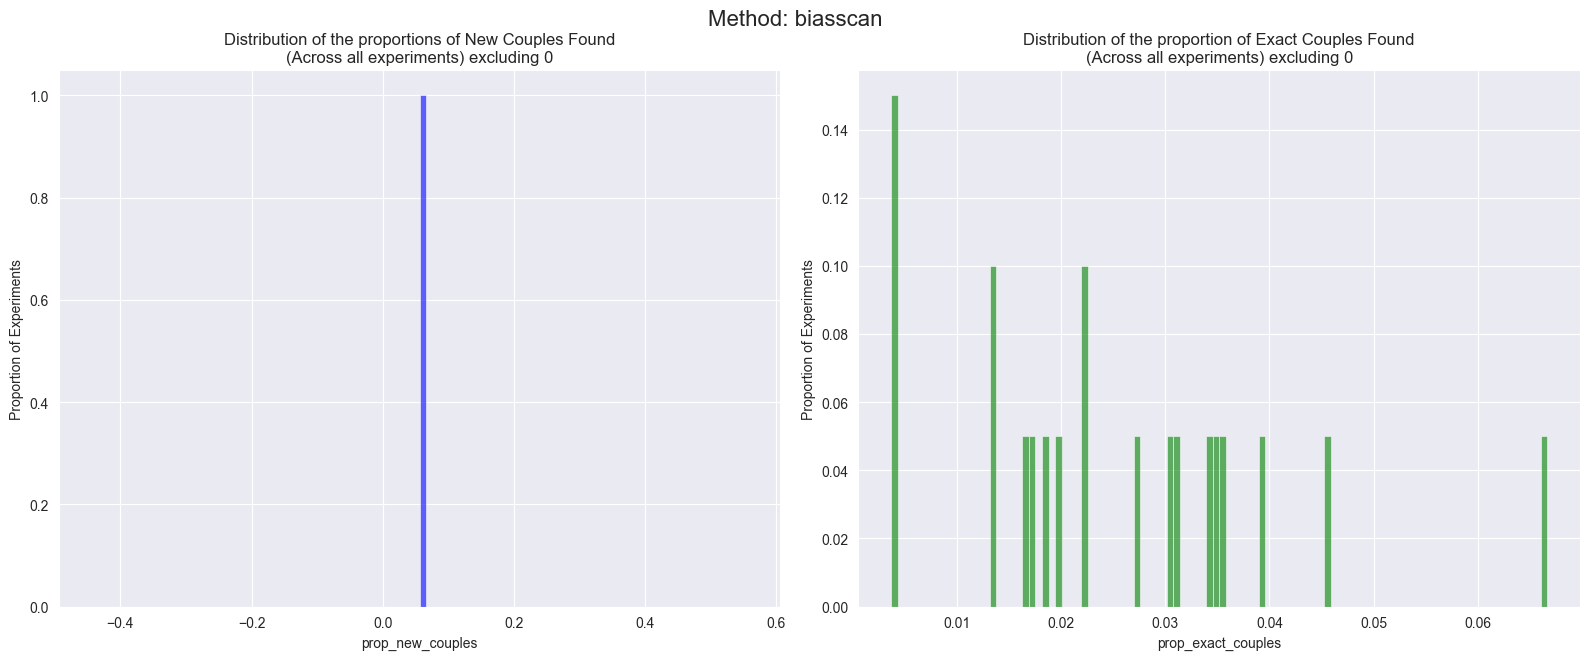

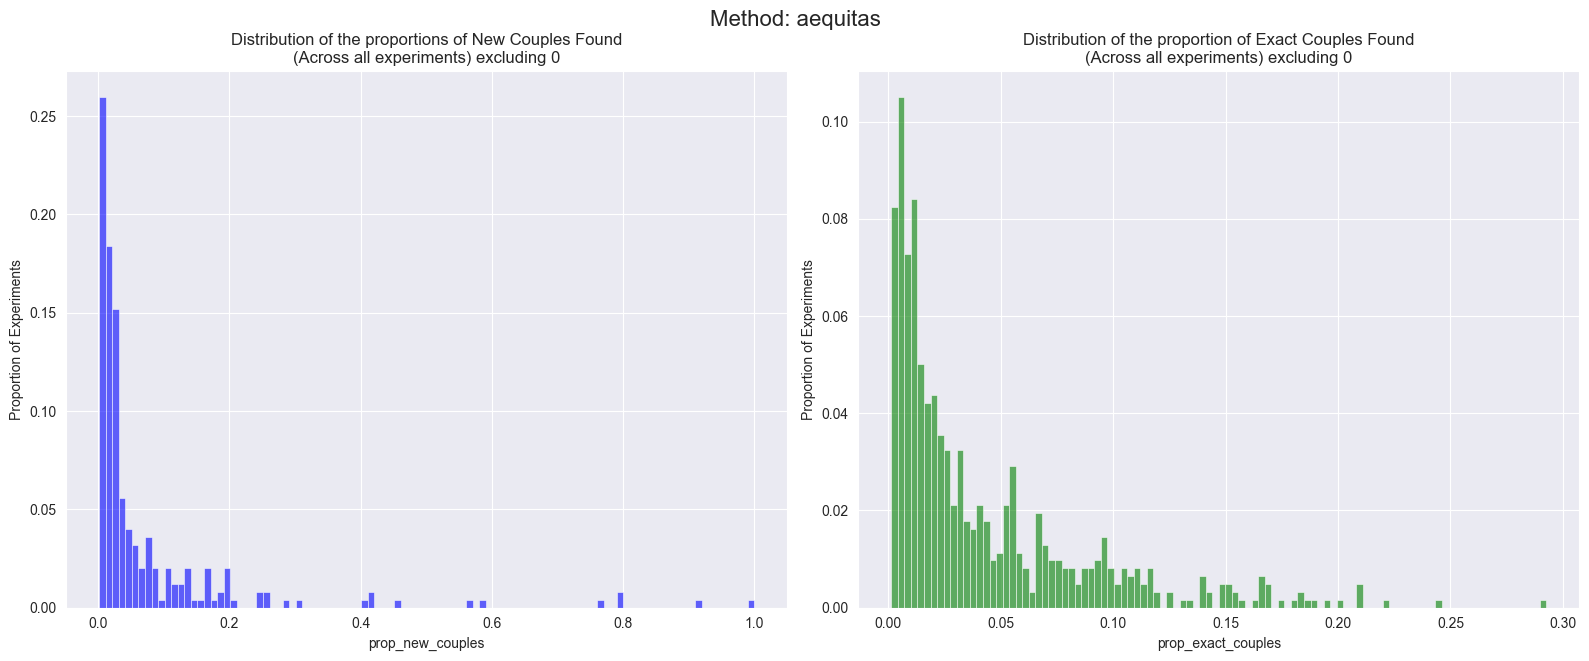

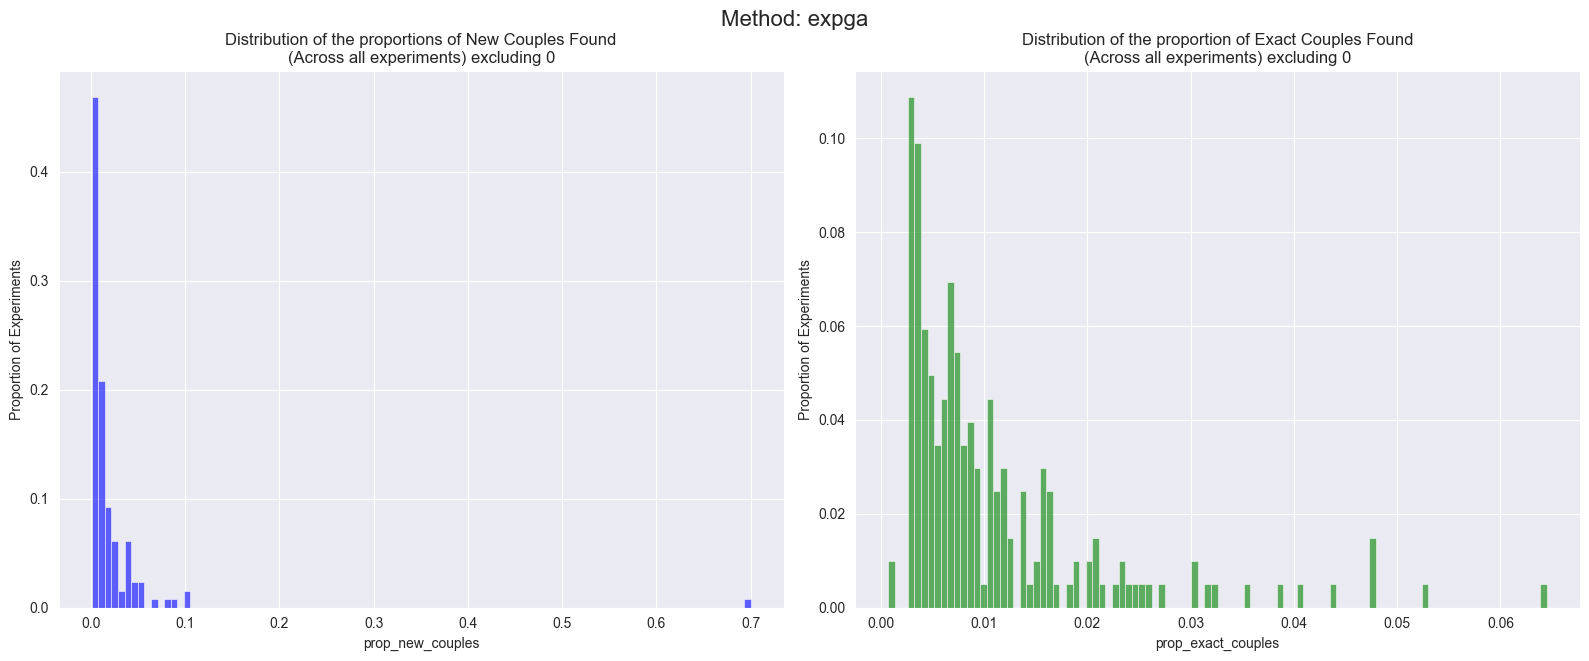

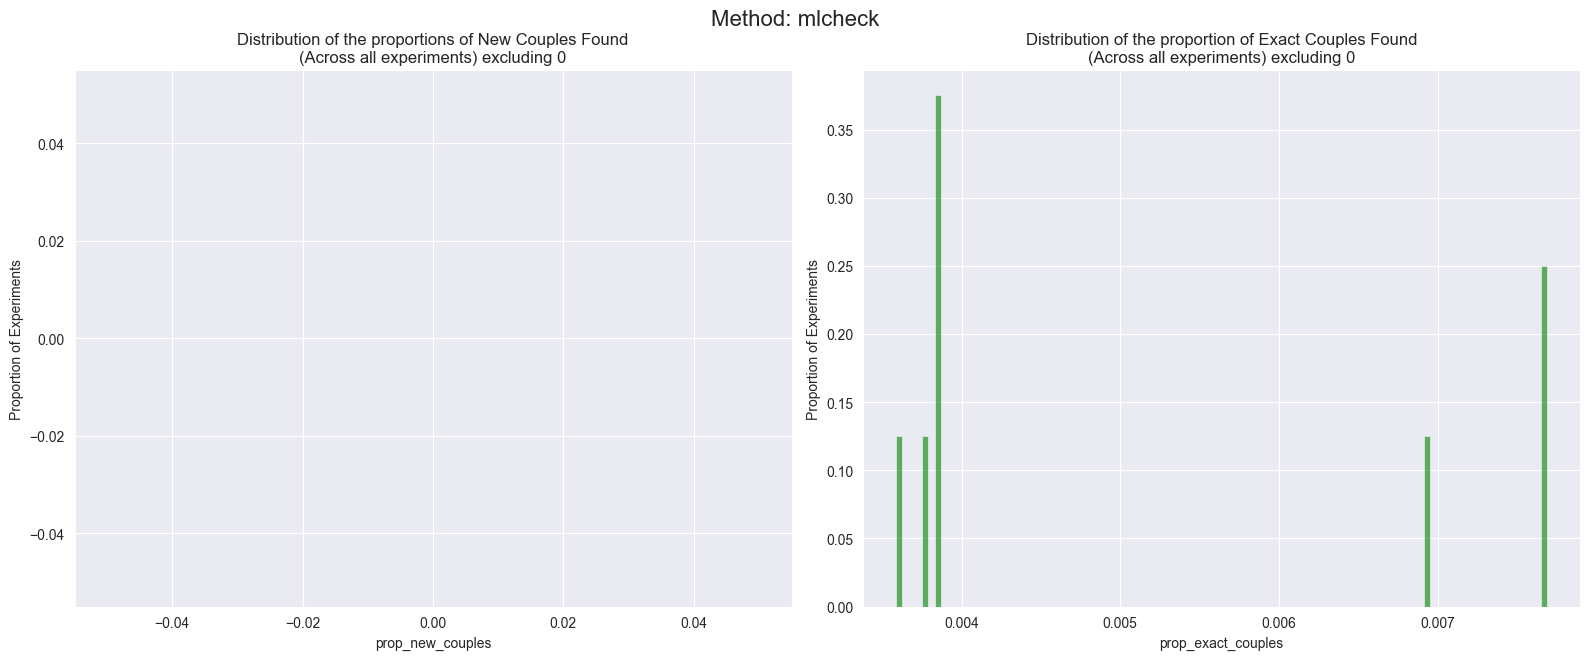

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate proportion of couples first
df['prop_new_couples'] = df['num_new_group_couples'] / df['calculated_group_size']
df['prop_exact_couples'] = df['num_exact_couple_matches'] / df['calculated_group_size']

# Get unique methods
methods = df['method_name'].unique()

for idx, method in enumerate(methods):
    # Filter data for this method
    method_df = df[df['method_name'] == method]

    # Calculate number of thresholds and adjust figure size accordingly
    thresholds = [0, 0.2, 0.4, 0.6, 0.8]
    n_thresholds = len(thresholds)
    total_plots = 4 + 2 * n_thresholds  # 2 initial plots + 2 plots per threshold
    n_rows = 4 + n_thresholds  # 2 rows for initial plots + 1 row per threshold

    # Create figure and subplots
    fig = plt.figure(figsize=(16, 6 * n_rows))
    fig.suptitle(f'Method: {method}', fontsize=16, y=0.995)
    gs = fig.add_gridspec(n_rows, 2)

    # First row: Raw distributions
    ax3 = fig.add_subplot(gs[0, 0])
    ax4 = fig.add_subplot(gs[0, 1])
    # ax3 = fig.add_subplot(gs[1, 0])
    # ax4 = fig.add_subplot(gs[1, 1])

    # Plot 1: Raw distribution of new couples found
    # sns.histplot(data=method_df, x='prop_new_couples', bins=100, ax=ax1, color='blue', alpha=0.6,
    #              stat="proportion")
    # ax1.set_title('Distribution of the proportions of New Couples Found\n(Across all experiments)')
    # ax1.set_ylabel('Proportion of Experiments')
    # 
    # # Plot 2: Raw distribution of exact couples found
    # sns.histplot(data=method_df, x='prop_exact_couples', bins=100, ax=ax2, color='green', alpha=0.6,
    #              stat="proportion")
    # ax2.set_title('Distribution of the proportion of Exact Couples Found\n(Across all experiments)')
    # ax2.set_ylabel('Proportion of Experiments')

    # Plot 3: Raw distribution of new couples found (excluding 0)
    sns.histplot(data=method_df[method_df['prop_new_couples'] > 0], x='prop_new_couples',
                 bins=100, ax=ax3, color='blue', alpha=0.6, stat="proportion")
    ax3.set_title('Distribution of the proportions of New Couples Found\n(Across all experiments) excluding 0')
    ax3.set_ylabel('Proportion of Experiments')

    # Plot 4: Raw distribution of exact couples found (excluding 0)
    sns.histplot(data=method_df[method_df['prop_exact_couples'] > 0], x='prop_exact_couples',
                 bins=100, ax=ax4, color='green', alpha=0.6, stat="proportion")
    ax4.set_title('Distribution of the proportion of Exact Couples Found\n(Across all experiments) excluding 0')
    ax4.set_ylabel('Proportion of Experiments')


    def df_new_couples_avg_calc(df, threshold):
        return df.groupby('experiment_id')['prop_new_couples'].apply(
            lambda x: (x > threshold).mean()
        ).reset_index(name='avg_new_couples_above_threshold')


    def df_exact_couples_avg_calc(df, threshold):
        return df.groupby('experiment_id')['prop_exact_couples'].apply(
            lambda x: (x > threshold).mean()
        ).reset_index(name='avg_exact_couples_above_threshold')


    # Create separate rows for each threshold
    # for i, thresh in enumerate(thresholds):
    #     # Create new axes for this threshold
    #     ax_new = fig.add_subplot(gs[i + 2, 0])
    #     ax_orig = fig.add_subplot(gs[i + 2, 1])
    # 
    #     # Plot distributions for new couples
    #     sns.histplot(data=df_new_couples_avg_calc(method_df, thresh),
    #                  x='avg_new_couples_above_threshold',
    #                  bins=30, ax=ax_new, color='purple', alpha=0.6,
    #                  stat="proportion")
    #     ax_new.set_title(
    #         f'Distribution of found groups within experiments\n when the threshold for finding a group is finding {thresh * 100}% of its couples \n(using New Couples)',
    #         fontsize=12)
    #     ax_new.set_xlabel('Proportion of Groups Above Threshold')
    #     ax_new.set_ylabel('Proportion of Experiments')
    #     ax_new.grid(True, alpha=0.3)
    # 
    #     # Plot distributions for exact couples
    #     sns.histplot(data=df_exact_couples_avg_calc(method_df, thresh),
    #                  x='avg_exact_couples_above_threshold',
    #                  bins=30, ax=ax_orig, color='orange', alpha=0.6,
    #                  stat="proportion")
    #     ax_orig.set_title(
    #         f'Distribution of found groups within experiments\n when the threshold for finding a group is finding {thresh * 100}% of its couples \n(using Exact Couples)',
    #         fontsize=12)
    #     ax_orig.set_xlabel('Proportion of Groups Above Threshold')
    #     ax_orig.set_ylabel('Proportion of Experiments')
    #     ax_orig.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [7]:
# Select only numeric columns
df1 = df[
    [c for c in list(df.columns) if c.startswith('calculated') or c.startswith('num_exact_') or c == 'method_name']]
df1.head()

,method_name,calculated_aleatoric,calculated_epistemic,calculated_granularity,calculated_group_size,calculated_intersectionality,calculated_magnitude,calculated_similarity,calculated_subgroup_ratio,calculated_uncertainty,num_exact_couple_matches
0,biasscan,0.166883,0.182671,0.1,709.0,0.2,0.147838,0.000000,0.198948,0.174777,0
1,biasscan,0.174807,0.185912,0.2,371.0,0.4,0.247976,0.250000,0.365392,0.180359,0
2,biasscan,0.147644,0.182152,0.4,737.0,0.6,0.060691,0.285714,0.366457,0.164898,0
3,biasscan,0.164342,0.188747,0.1,252.0,1.0,0.287647,0.166667,0.087207,0.176544,0
4,biasscan,0.188023,0.186986,0.4,186.0,0.4,0.206564,0.000000,0.477279,0.187504,0


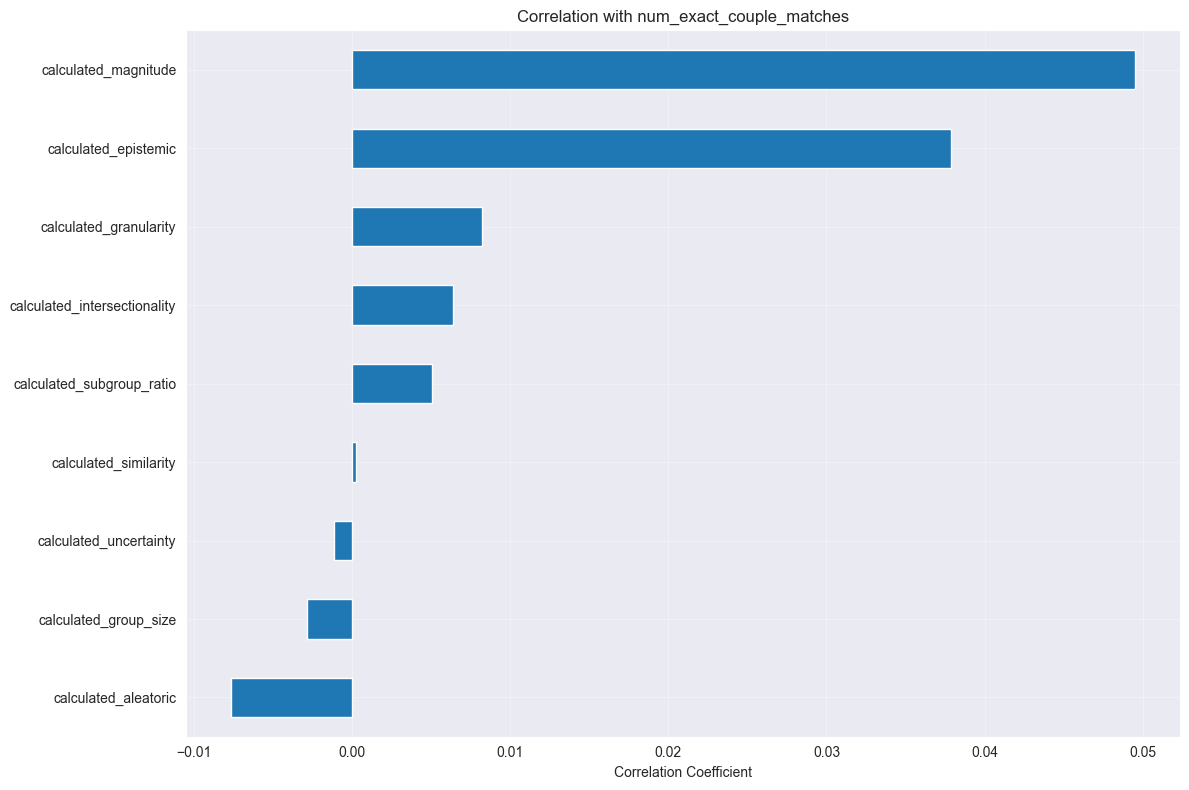

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = df1.select_dtypes(include=[np.number]).columns
correlations = df1[numeric_cols].corr()['num_exact_couple_matches'].sort_values()

correlations = correlations.drop('num_exact_couple_matches')

# Create a figure with a larger size
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
correlations.plot(kind='barh')

# Customize the plot
plt.title('Correlation with num_exact_couple_matches')
plt.xlabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

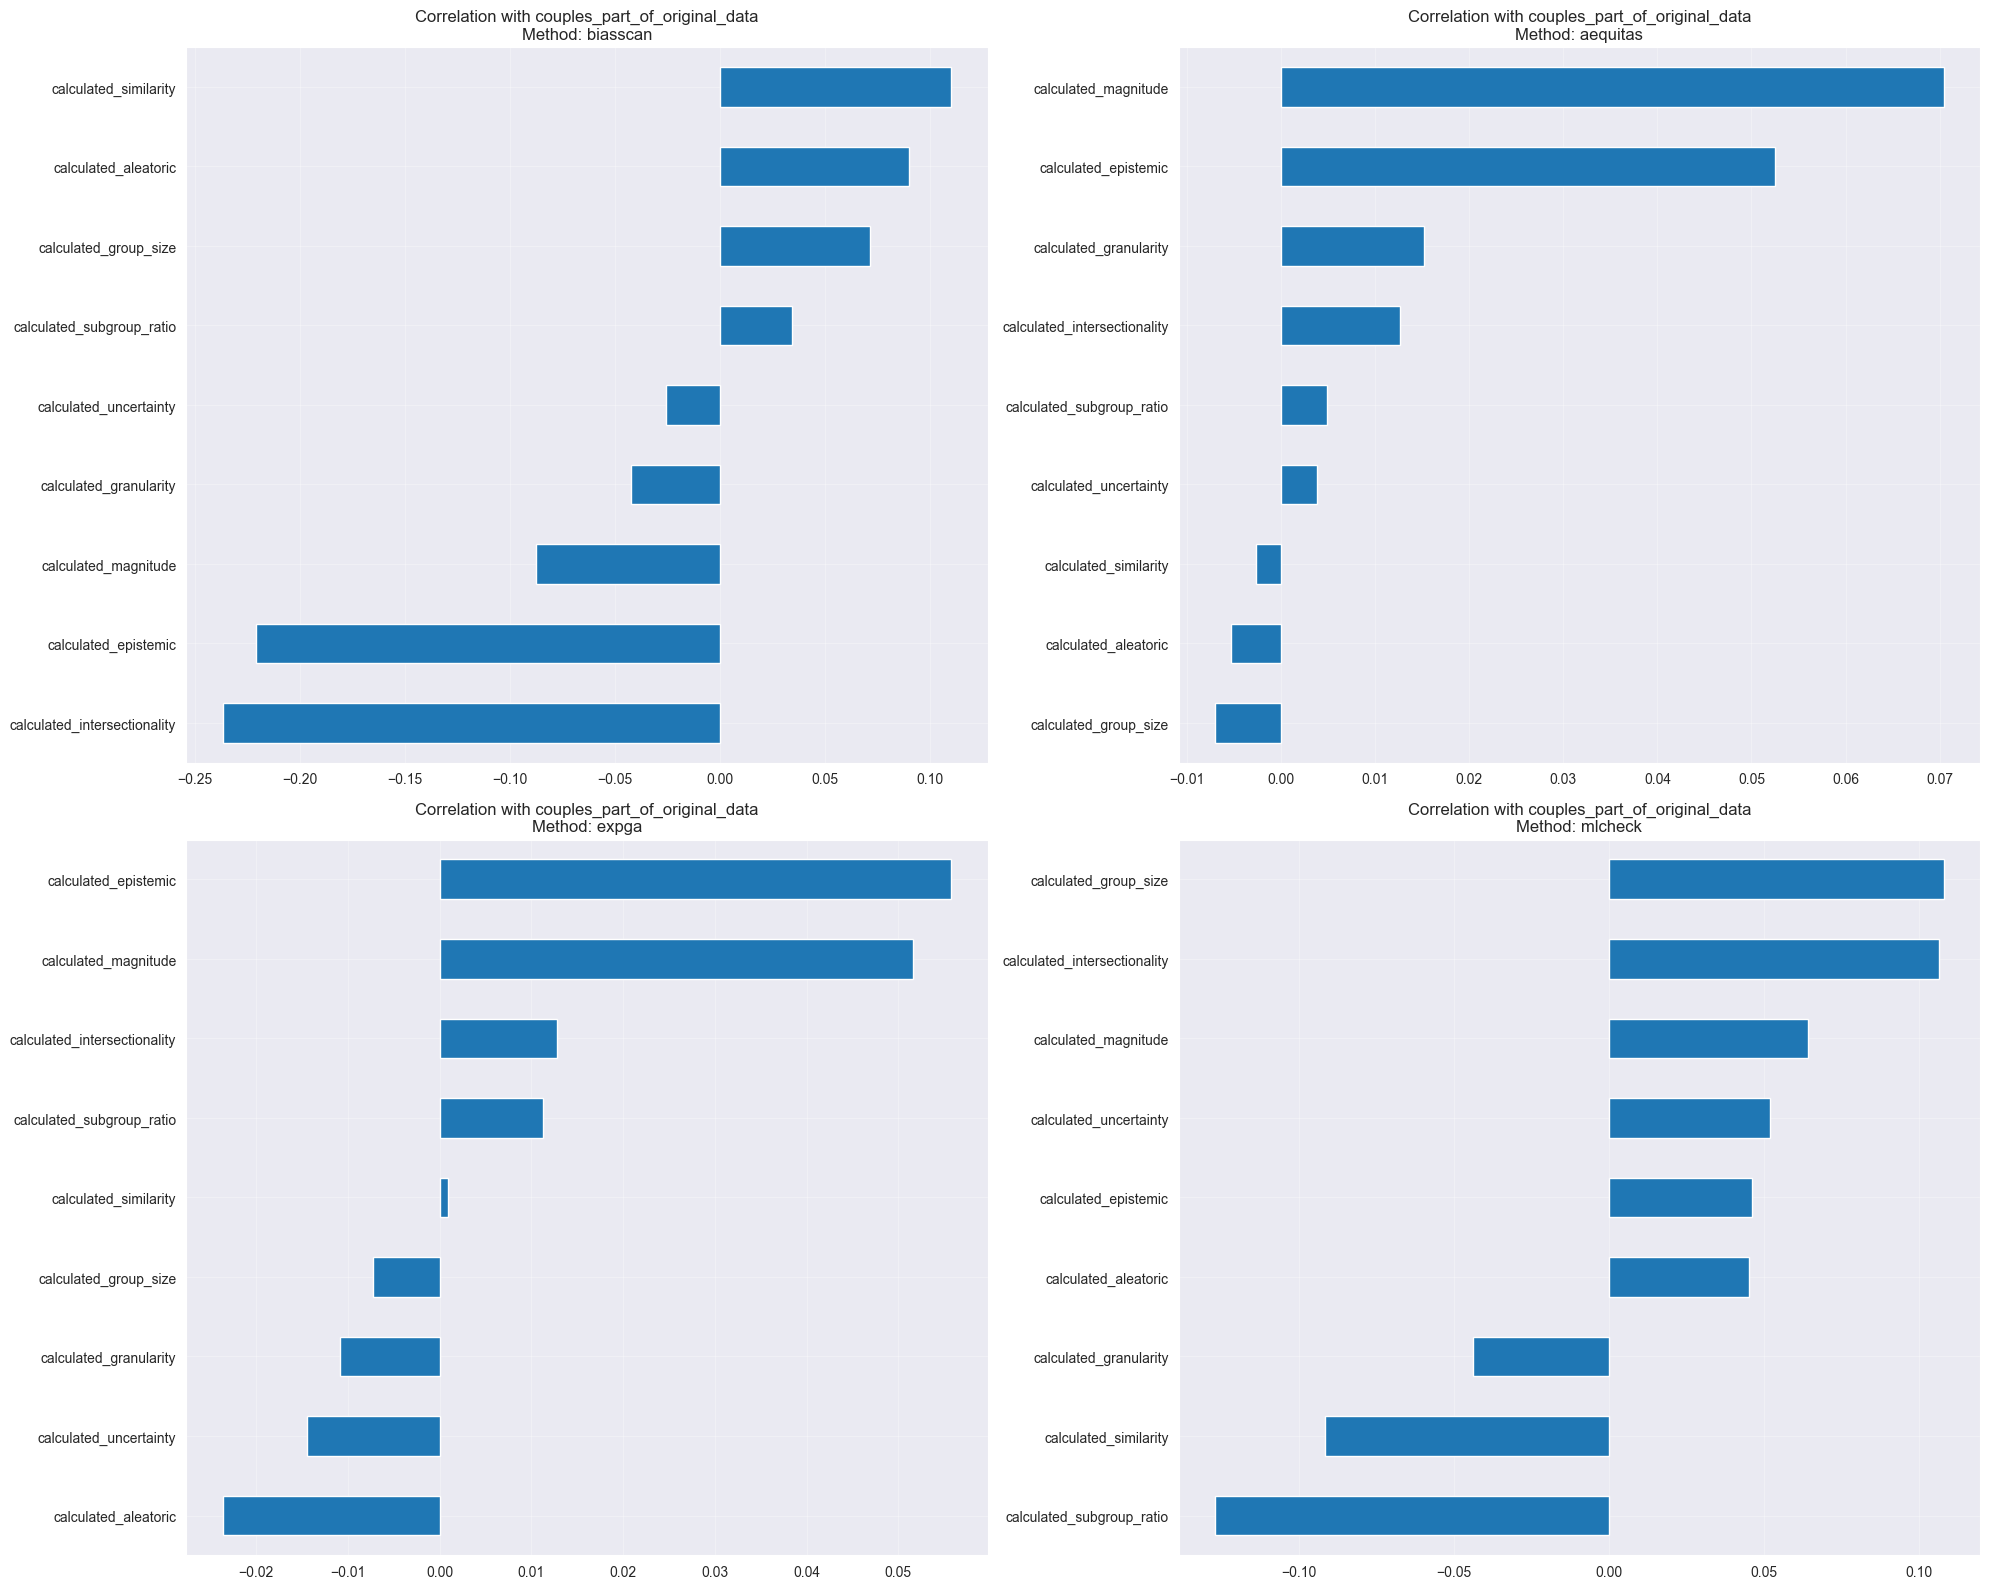

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique methods
methods = df1['method_name'].unique()

# Create a figure with subplots - one for each method
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
axs = axs.ravel()  # Flatten the 2x2 array for easier indexing

# For each method
for idx, method in enumerate(methods):
    # Filter data for this method
    method_df = df1[df1['method_name'] == method]

    # Get numeric columns
    numeric_cols = method_df.select_dtypes(include=[np.number]).columns

    # Calculate correlations
    correlations = method_df[numeric_cols].corr()['num_exact_couple_matches'].sort_values()
    correlations = correlations.drop('num_exact_couple_matches')

    # Plot on corresponding subplot
    correlations.plot(kind='barh', ax=axs[idx])
    axs[idx].set_title(f'Correlation with couples_part_of_original_data\nMethod: {method}')
    axs[idx].grid(True, alpha=0.3)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
df2 = df[[c for c in list(df.columns) if c.startswith('calculated') or c.startswith('num_new_') or c == 'method_name']]
df2.head()

,method_name,calculated_aleatoric,calculated_epistemic,calculated_granularity,calculated_group_size,calculated_intersectionality,calculated_magnitude,calculated_similarity,calculated_subgroup_ratio,calculated_uncertainty,num_new_group_couples
0,biasscan,0.166883,0.182671,0.1,709.0,0.2,0.147838,0.000000,0.198948,0.174777,0
1,biasscan,0.174807,0.185912,0.2,371.0,0.4,0.247976,0.250000,0.365392,0.180359,0
2,biasscan,0.147644,0.182152,0.4,737.0,0.6,0.060691,0.285714,0.366457,0.164898,0
3,biasscan,0.164342,0.188747,0.1,252.0,1.0,0.287647,0.166667,0.087207,0.176544,0
4,biasscan,0.188023,0.186986,0.4,186.0,0.4,0.206564,0.000000,0.477279,0.187504,0


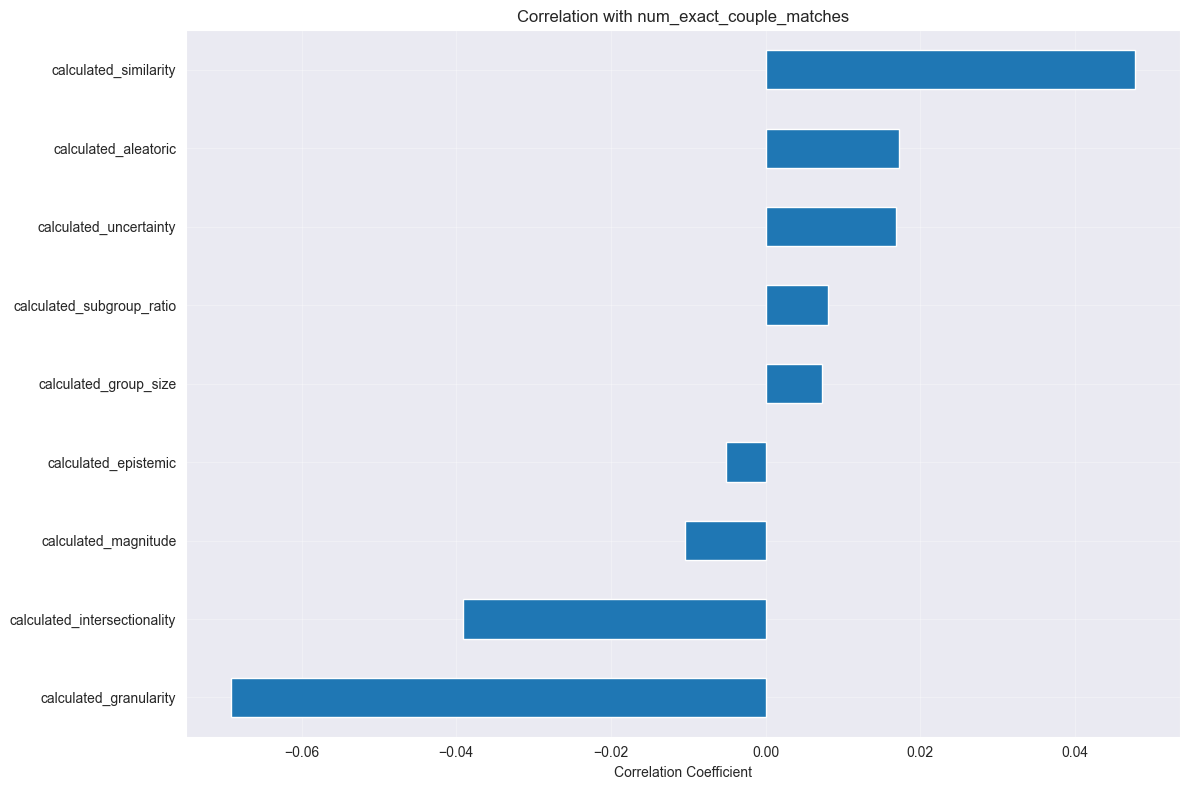

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = df2.select_dtypes(include=[np.number]).columns
correlations = df2[numeric_cols].corr()['num_new_group_couples'].sort_values()

correlations = correlations.drop('num_new_group_couples')

# Create a figure with a larger size
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
correlations.plot(kind='barh')

# Customize the plot
plt.title('Correlation with num_exact_couple_matches')
plt.xlabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

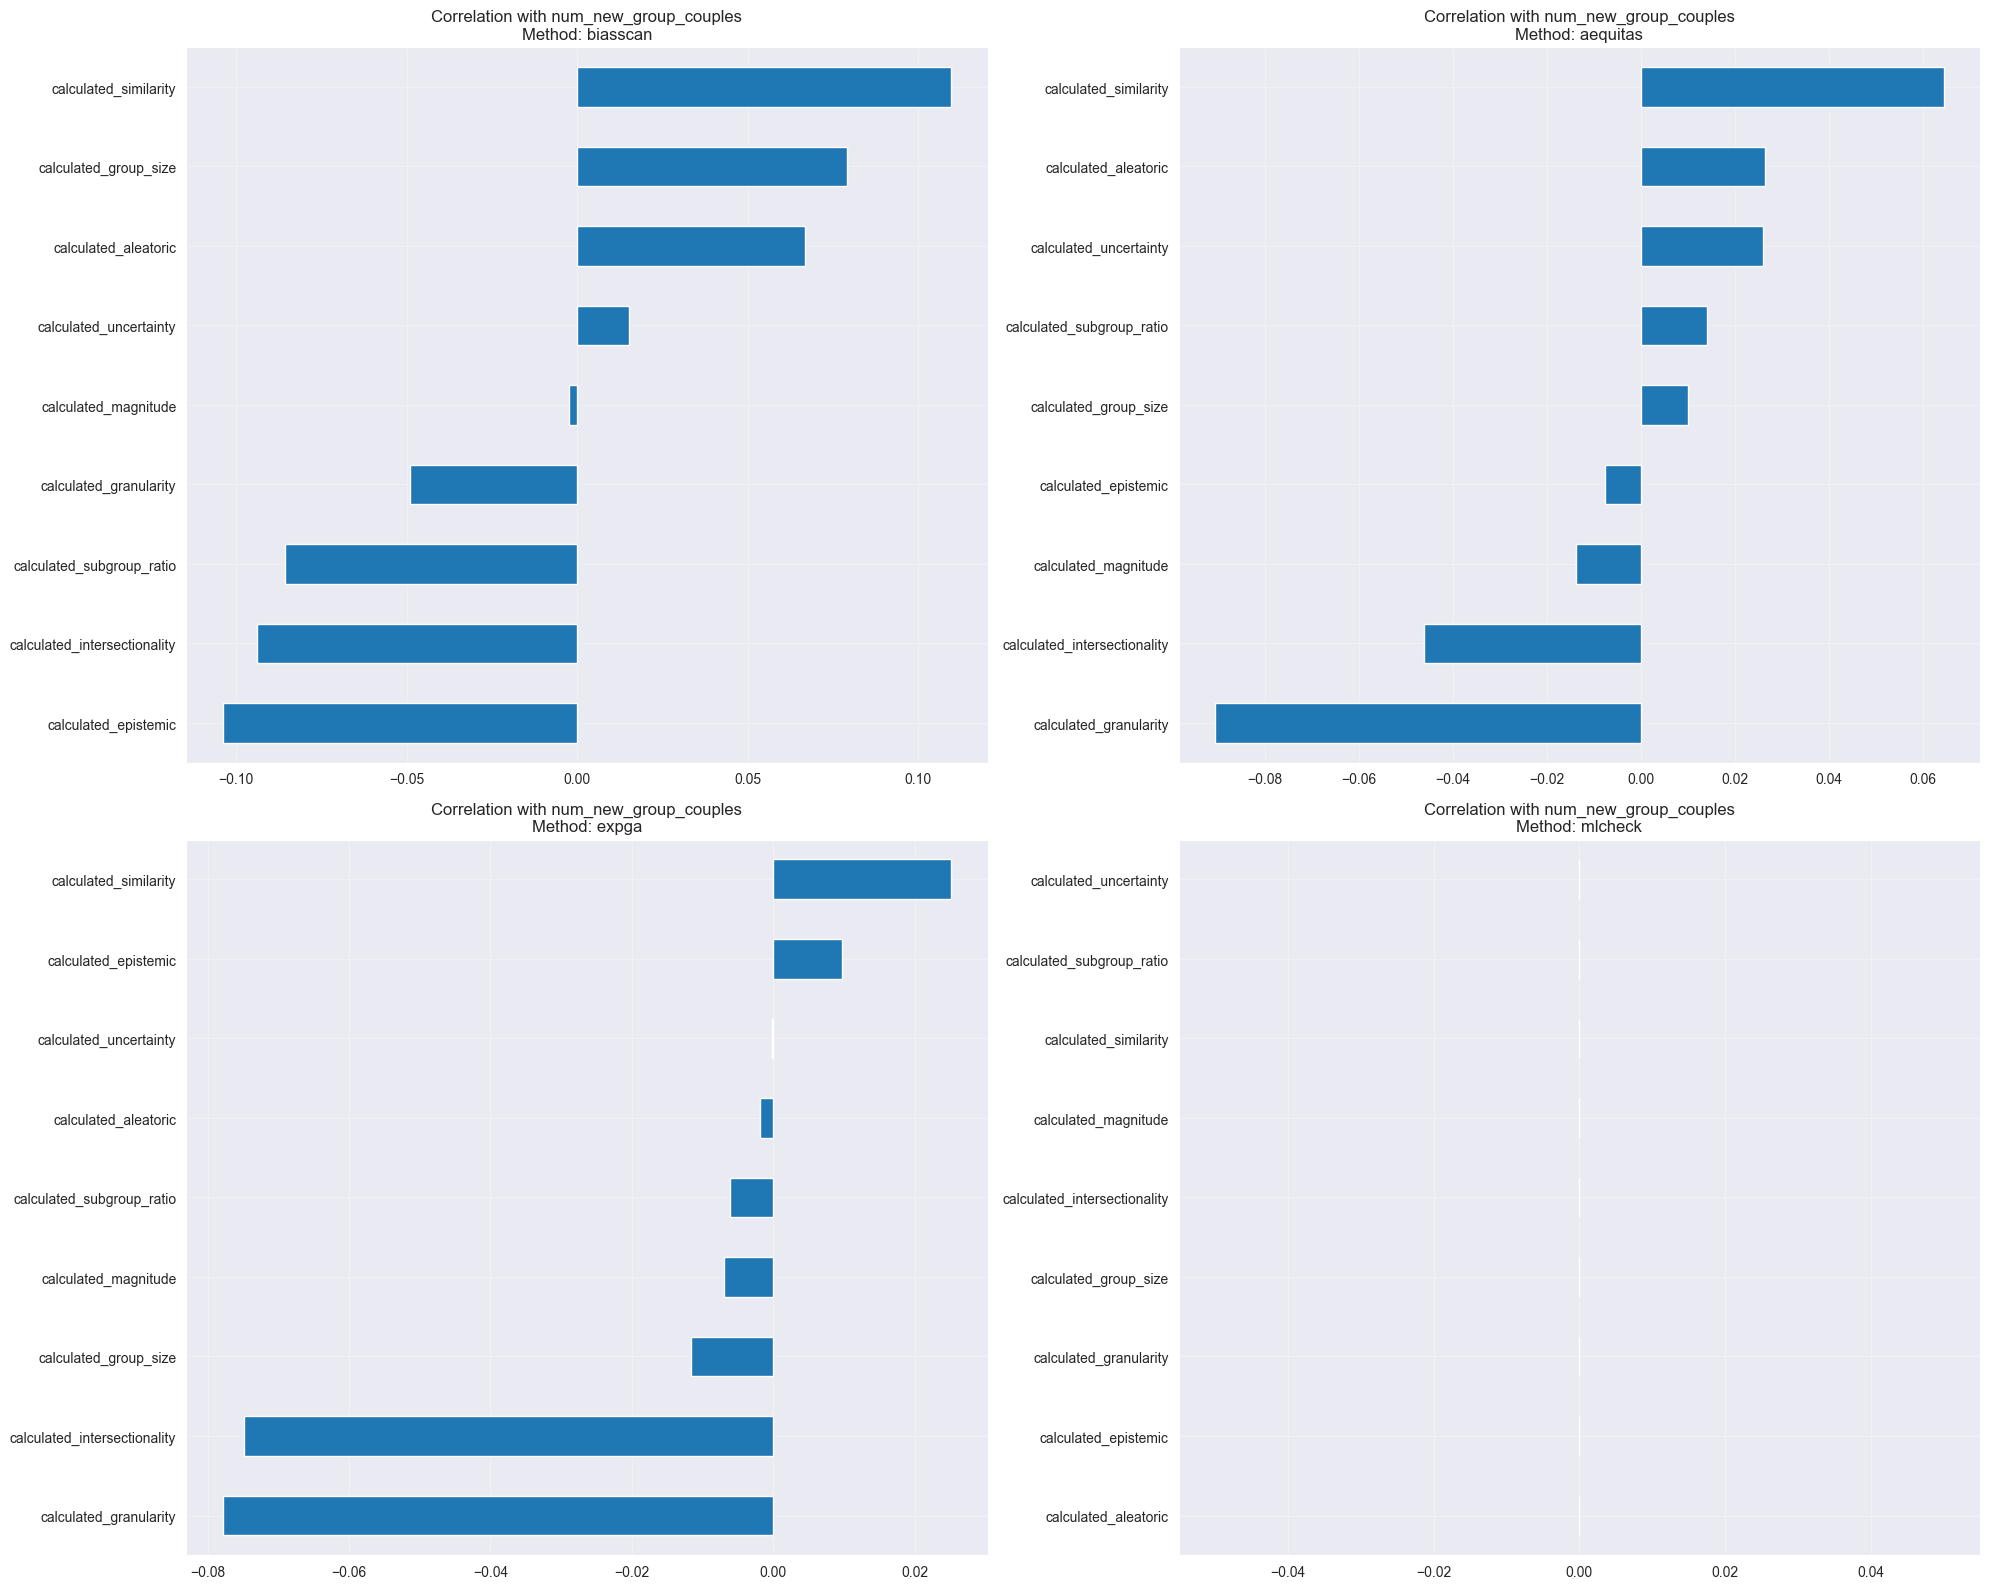

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique methods
methods = df2['method_name'].unique()

# Create a figure with subplots - one for each method
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
axs = axs.ravel()  # Flatten the 2x2 array for easier indexing

# For each method
for idx, method in enumerate(methods):
    # Filter data for this method
    method_df = df2[df2['method_name'] == method]

    # Get numeric columns
    numeric_cols = method_df.select_dtypes(include=[np.number]).columns

    # Calculate correlations
    correlations = method_df[numeric_cols].corr()['num_new_group_couples'].sort_values()
    correlations = correlations.drop('num_new_group_couples')

    # Plot on corresponding subplot
    correlations.plot(kind='barh', ax=axs[idx])
    axs[idx].set_title(f'Correlation with num_new_group_couples\nMethod: {method}')
    axs[idx].grid(True, alpha=0.3)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')


# Prepare the data
def prepare_data(df):
    # Create copy to avoid modifying original
    df_copy = df.copy()

    # Convert categorical variables to numeric
    categorical_columns = df_copy.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        df_copy[col] = pd.factorize(df_copy[col])[0]
    # Remove excluded columns and target variable
    X = df_copy[
        [c for c in list(df.columns) if c.startswith('calculated') or c.startswith('num_exact_') or c == 'method_name']]
    y = df_copy['num_exact_couple_matches']

    return X, y


# Calculate CATE for each feature
def calculate_cate(model, X, feature_name):
    X_plus = X.copy()
    X_minus = X.copy()

    # Calculate standard deviation of the feature
    std_dev = X[feature_name].std()

    # Create variations
    X_plus[feature_name] = X[feature_name] + std_dev
    X_minus[feature_name] = X[feature_name] - std_dev

    # Predict for both variations
    pred_plus = model.predict(X_plus)
    pred_minus = model.predict(X_minus)

    # Calculate average treatment effect
    cate = np.mean(pred_plus - pred_minus)

    return cate


# Prepare the data
X, y = prepare_data(df)

# Train random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Calculate CATE for each feature
cate_results = []
for feature in X.columns:
    cate = calculate_cate(model, X, feature)
    cate_results.append({
        'feature': feature,
        'cate': abs(cate)  # Use absolute value for magnitude of effect
    })

# Create results DataFrame and sort by absolute CATE value
results_df = pd.DataFrame(cate_results)
results_df = results_df.sort_values('cate', ascending=False)

# Calculate feature importances from random forest
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)

print("Top 10 Features by CATE Analysis:")
print(results_df.head(10))
print("\nTop 10 Features by Random Forest Importance:")
print(importances.head(10))

Top 10 Features by CATE Analysis:
                         feature      cate
10      num_exact_couple_matches  2.040360
2           calculated_epistemic  0.000347
1           calculated_aleatoric  0.000103
8      calculated_subgroup_ratio  0.000097
4          calculated_group_size  0.000084
9         calculated_uncertainty  0.000070
7          calculated_similarity  0.000064
5   calculated_intersectionality  0.000041
0                    method_name  0.000027
3         calculated_granularity  0.000015

Top 10 Features by Random Forest Importance:
                         feature  importance
10      num_exact_couple_matches    0.999046
2           calculated_epistemic    0.000255
8      calculated_subgroup_ratio    0.000175
6           calculated_magnitude    0.000134
1           calculated_aleatoric    0.000099
9         calculated_uncertainty    0.000081
4          calculated_group_size    0.000063
5   calculated_intersectionality    0.000063
7          calculated_similarity    0.0000

In [14]:
import json

random_experiment_id = 'bff3c337-f2f1-4e05-bcdd-75bb09a874a4'
df_synth = pd.read_sql_query(
    f"SELECT experiment_id, full_data FROM synthetic_data where experiment_id='{random_experiment_id}'", conn)
df_synth = pd.DataFrame(json.loads(df_synth['full_data'].iloc[0]))
df_synth['experiment_id'] = random_experiment_id
df_synth.head()

IndexError: single positional indexer is out-of-bounds

In [11]:
random_experiment_id = 'bff3c337-f2f1-4e05-bcdd-75bb09a874a4'
df_result = pd.read_sql_query(
    f"SELECT * FROM augmented_results ar left join main.analysis_metadata am on am.analysis_id=ar.analysis_id where experiment_id='{random_experiment_id}'",
    conn)
df_result_data = pd.DataFrame(list(df_result['data'].apply(json.loads)))
df_result = pd.concat([df_result.reset_index(drop=True), df_result_data.reset_index(drop=True)], axis=1)
df_result.head()

,analysis_id,indv_key,couple_key,is_original_data,is_individual_part_of_a_group,is_couple_part_of_a_group,matching_groups,data,analysis_id,experiment_id,...,Attr1_T,Attr2_T,Attr2_X,Attr3_T,Attr3_X,Attr4_X,Attr5_X,Attr4_T,Attr5_T,outcome
0,e8fa4983-30ed-4e09-a286-427e84c323f8,2|4|0|4|4|1|0|2|0|5,2|4|0|4|4|1|0|2|0|5-2|0|0|4|4|1|0|2|0|5,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 4, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,4,0,4,4,1,0,2,0,5,0
1,e8fa4983-30ed-4e09-a286-427e84c323f8,2|0|0|4|4|1|0|2|0|5,2|0|0|4|4|1|0|2|0|5-2|4|0|4|4|1|0|2|0|5,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,4,4,1,0,2,0,5,3
2,e8fa4983-30ed-4e09-a286-427e84c323f8,2|0|0|4|3|0|3|2|4|2,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,4,3,0,3,2,4,2,1
3,e8fa4983-30ed-4e09-a286-427e84c323f8,2|3|0|4|3|0|3|2|4|2,2|3|0|4|3|0|3|2|4|2-2|0|0|4|3|0|3|2|4|2,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 3, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,3,0,4,3,0,3,2,4,2,3
4,e8fa4983-30ed-4e09-a286-427e84c323f8,0|2|3|3|2|1|3|1|2|2,0|2|3|3|2|1|3|1|2|2-0|0|3|3|2|1|3|1|2|2,0,0,0,[],"{""Attr1_X"": 0, ""Attr1_T"": 2, ""Attr2_T"": 3, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,2,3,3,2,1,3,1,2,2,1


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from umap.umap_ import UMAP
from sklearn.preprocessing import StandardScaler

train_cols = [c for c in df_synth.columns if c.startswith('Attr')]

original_data = df_synth[train_cols].copy()
result_data = df_result[train_cols + ['is_original_data', 'is_couple_part_of_a_group']].copy()
result_data['is_original_data'] = pd.to_numeric(result_data['is_original_data'])
result_data['is_couple_part_of_a_group'] = pd.to_numeric(result_data['is_couple_part_of_a_group'])
df_result.sort_values(['couple_key'], inplace=True)
df_result.head()

,analysis_id,indv_key,couple_key,is_original_data,is_individual_part_of_a_group,is_couple_part_of_a_group,matching_groups,data,analysis_id,experiment_id,...,Attr1_T,Attr2_T,Attr2_X,Attr3_T,Attr3_X,Attr4_X,Attr5_X,Attr4_T,Attr5_T,outcome
1818,e8fa4983-30ed-4e09-a286-427e84c323f8,0|0|0|0|0|0|0|4|2|1,0|0|0|0|0|0|0|4|2|1-0|0|1|0|0|0|0|4|2|1,0,0,0,[],"{""Attr1_X"": 0, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,0,0,0,0,4,2,1,2
314,e8fa4983-30ed-4e09-a286-427e84c323f8,0|0|0|0|1|1|2|4|0|1,0|0|0|0|1|1|2|4|0|1-0|3|0|0|1|1|2|4|0|1,0,0,0,[],"{""Attr1_X"": 0, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,0,1,1,2,4,0,1,1
312,e8fa4983-30ed-4e09-a286-427e84c323f8,0|0|0|0|1|1|2|4|2|1,0|0|0|0|1|1|2|4|2|1-0|3|0|0|1|1|2|4|2|1,0,0,0,[],"{""Attr1_X"": 0, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,0,1,1,2,4,2,1,1
1814,e8fa4983-30ed-4e09-a286-427e84c323f8,0|0|0|0|2|0|0|4|0|1,0|0|0|0|2|0|0|4|0|1-0|0|1|0|2|0|0|4|0|1,0,0,0,[],"{""Attr1_X"": 0, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,0,2,0,0,4,0,1,2
1812,e8fa4983-30ed-4e09-a286-427e84c323f8,0|0|0|0|2|0|0|4|0|1,0|0|0|0|2|0|0|4|0|1-0|0|3|0|2|0|0|4|0|1,0,0,0,[],"{""Attr1_X"": 0, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,0,2,0,0,4,0,1,2


In [13]:
n_neighbors = 15
min_dist = 0.1
random_state = 42

# Remove the special columns from result_data for UMAP
special_cols = ['is_original_data', 'is_couple_part_of_a_group']
result_features = result_data.drop(columns=special_cols)

# Get numeric columns (excluding special columns)
numeric_cols = original_data.select_dtypes(include=[np.number]).columns
original_features = original_data[numeric_cols]
result_features = result_features[numeric_cols]

# Scale both datasets using the same scaler (fit on original data)
scaler = StandardScaler()
original_scaled = scaler.fit_transform(original_features)
result_scaled = scaler.transform(result_features)

# Fit UMAP on original data and transform both datasets
umap_model = UMAP(n_neighbors=n_neighbors,
                  min_dist=min_dist,
                  random_state=random_state,
                  verbose=True)
original_embedding = umap_model.fit_transform(original_scaled)
result_embedding = umap_model.transform(result_scaled)


UMAP(n_jobs=1, random_state=42, verbose=True)
Sun Nov 17 21:12:28 2024 Construct fuzzy simplicial set
Sun Nov 17 21:12:28 2024 Finding Nearest Neighbors
Sun Nov 17 21:12:31 2024 Finished Nearest Neighbor Search
Sun Nov 17 21:12:34 2024 Construct embedding


Epochs completed:   4%| ▍          22/500 [00:01]

	completed  0  /  500 epochs


Epochs completed:  22%| ██▏        109/500 [00:01]

	completed  50  /  500 epochs
	completed  100  /  500 epochs


Epochs completed:  40%| ████       202/500 [00:01]

	completed  150  /  500 epochs
	completed  200  /  500 epochs


Epochs completed:  59%| █████▉     297/500 [00:01]

	completed  250  /  500 epochs
	completed  300  /  500 epochs


Epochs completed:  84%| ████████▎  418/500 [00:02]

	completed  350  /  500 epochs
	completed  400  /  500 epochs


Epochs completed:  96%| █████████▌ 478/500 [00:02]

	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:02]


Sun Nov 17 21:12:36 2024 Finished embedding


Epochs completed:   8%| ▊          8/100 [00:00]

	completed  0  /  100 epochs


Epochs completed:  14%| █▍         14/100 [00:00]

	completed  10  /  100 epochs


Epochs completed:  23%| ██▎        23/100 [00:00]

	completed  20  /  100 epochs


Epochs completed:  35%| ███▌       35/100 [00:01]

	completed  30  /  100 epochs


Epochs completed:  44%| ████▍      44/100 [00:01]

	completed  40  /  100 epochs


Epochs completed:  56%| █████▌     56/100 [00:02]

	completed  50  /  100 epochs


Epochs completed:  65%| ██████▌    65/100 [00:02]

	completed  60  /  100 epochs


Epochs completed:  77%| ███████▋   77/100 [00:03]

	completed  70  /  100 epochs


Epochs completed:  86%| ████████▌  86/100 [00:03]

	completed  80  /  100 epochs


Epochs completed:  92%| █████████▏ 92/100 [00:03]

	completed  90  /  100 epochs


Epochs completed: 100%| ██████████ 100/100 [00:04]


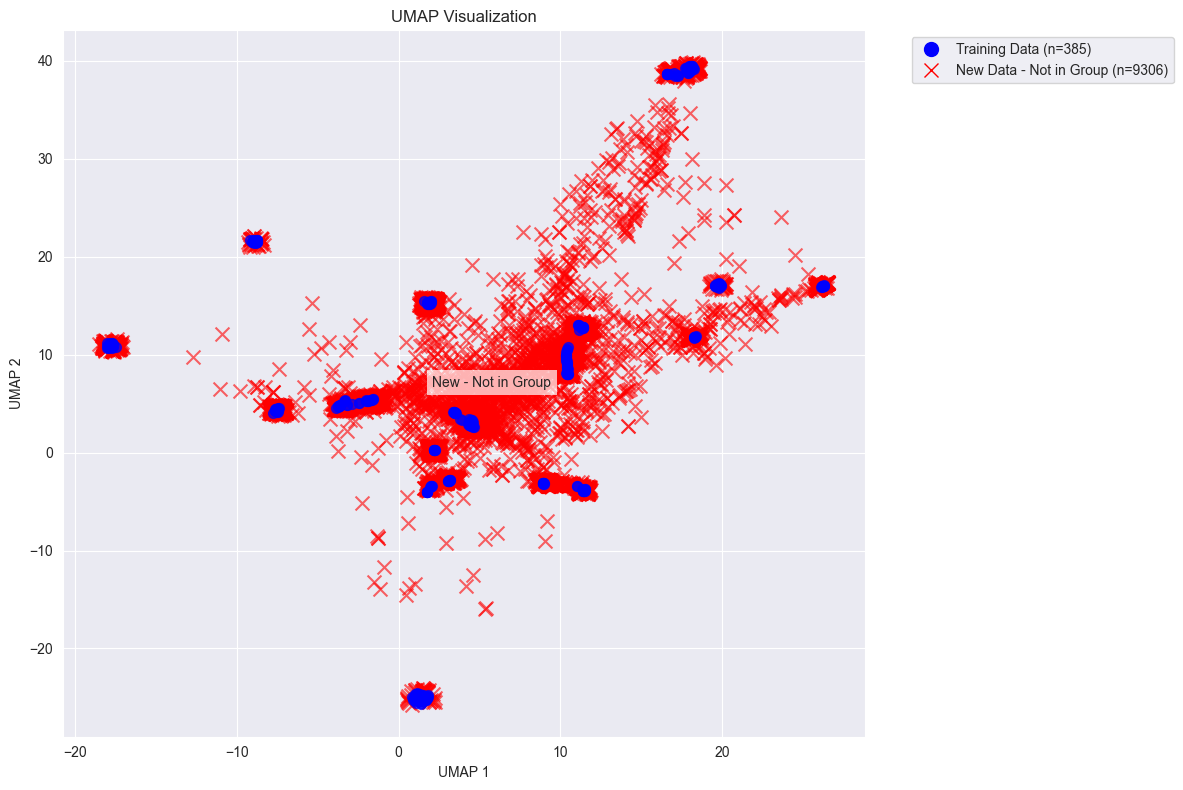

In [14]:
# Create the plot
plt.figure(figsize=(12, 8))

# Split result data into different categories for layered plotting
is_original = result_data['is_original_data'] != 0
is_group = result_data['is_couple_part_of_a_group'] != 0

# Create masks for different combinations
mask_not_original_not_group = (~is_original) & (~is_group)
mask_not_original_is_group = (~is_original) & is_group
mask_is_original_not_group = is_original & (~is_group)
mask_is_original_is_group = is_original & is_group


# Function to calculate centroid of points
def get_centroid(points):
    if len(points) > 0:
        return np.mean(points[:, 0]), np.mean(points[:, 1])
    return None, None


# Plot layers from bottom to top
# 1. Not original and not group (red crosses)
if np.any(mask_not_original_not_group):
    points = result_embedding[mask_not_original_not_group]
    plt.scatter(points[:, 0], points[:, 1],
                color='red', marker='x', s=100, alpha=0.6,
                label='New Data - Not in Group')
    # Add label at centroid
    x_center, y_center = get_centroid(points)
    if x_center is not None:
        plt.text(x_center, y_center, 'New - Not in Group',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                 ha='center', va='center')

# 3. Original but not in group (red circles)
if np.any(mask_is_original_not_group):
    points = result_embedding[mask_is_original_not_group]
    plt.scatter(points[:, 0], points[:, 1],
                color='red', marker='o', s=100, alpha=0.6,
                label='Original Data - Not in Group')
    # Add label at centroid
    x_center, y_center = get_centroid(points)
    if x_center is not None:
        plt.text(x_center, y_center, 'Original - Not in Group',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                 ha='center', va='center')

# 2. Not original but in group (green crosses)
if np.any(mask_not_original_is_group):
    points = result_embedding[mask_not_original_is_group]
    plt.scatter(points[:, 0], points[:, 1],
                color='green', marker='x', s=100, alpha=0.6,
                label='New Data - In Group')
    # Add label at centroid
    x_center, y_center = get_centroid(points)
    if x_center is not None:
        plt.text(x_center, y_center, 'New - In Group',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                 ha='center', va='center')

# 4. Original and in group (green circles) - top layer
if np.any(mask_is_original_is_group):
    points = result_embedding[mask_is_original_is_group]
    plt.scatter(points[:, 0], points[:, 1],
                color='green', marker='o', s=100, alpha=0.8,
                label='Original Data - In Group')
    # Add label at centroid
    x_center, y_center = get_centroid(points)
    if x_center is not None:
        plt.text(x_center, y_center, 'Original - In Group',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                 ha='center', va='center')

# Plot original data in blue (bottom layer)
plt.scatter(original_embedding[:, 0], original_embedding[:, 1],
            color='blue', alpha=0.7, label='Training Data',
            marker='o', s=50)

# Add counts to the legend
legend_elements = []
counts = {
    'Training Data': len(original_embedding),
    'Original Data - In Group': np.sum(mask_is_original_is_group),
    'Original Data - Not in Group': np.sum(mask_is_original_not_group),
    'New Data - In Group': np.sum(mask_not_original_is_group),
    'New Data - Not in Group': np.sum(mask_not_original_not_group)
}

# Create custom legend with counts
for label, count in counts.items():
    if count > 0:  # Only show categories that have data points
        legend_elements.append(plt.Line2D([0], [0], marker='o' if 'Original' in label or 'Training' in label else 'x',
                                          color='blue' if 'Training' in label else (
                                              'green' if 'In Group' in label else 'red'),
                                          label=f'{label} (n={count})',
                                          markersize=10, linestyle='None'))

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('UMAP Visualization')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.tight_layout()

Ici on voit que l'algorithme cherche aux alentours des données originales mais cela ne veut pas dire que les combinaisons d'individus qui trouvent constituent une discriminationq


In [15]:
synth_combinations_df = DiscriminationData.generate_individual_synth_combinations(df_synth)
print(f"Created {len(synth_combinations_df)} combinations from unique individuals")
synth_combinations_df.sort_values(by=['group_key'], inplace=True)
synth_combinations_df.head(10)

Created 4990 combinations from unique individuals


,group_key,subgroup1_key,subgroup2_key,indv_key_1,indv_key_2,couple_key,Attr1_X_1,Attr1_X_2,Attr2_X_1,Attr2_X_2,...,Attr1_T_1,Attr1_T_2,Attr2_T_1,Attr2_T_2,Attr3_T_1,Attr3_T_2,Attr4_T_1,Attr4_T_2,Attr5_T_1,Attr5_T_2
0,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
50,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
49,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
48,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
47,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
46,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
45,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
51,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
44,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
42,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0


In [16]:
import pandas as pd
from itertools import combinations

feature_cols = list(filter(lambda x: 'Attr' in x, df_synth.columns))
all_combinations = []
for couple_key in df_result['couple_key'].unique():

    indivs = couple_key.split('-')

    couple_data = df_result[df_result['indv_key'].isin(indivs)]

    if couple_data.shape[0] == 2:
        continue

    is_part_of_group = couple_data['is_couple_part_of_a_group'].iloc[0] != 0

    unique_individuals = couple_data[feature_cols].drop_duplicates().values

    pairs = list(combinations(range(len(unique_individuals)), 2))

    for i, j in pairs:
        combination = {
            'couple_key': couple_key,
            'pair_id': f"{couple_key}_pair_{i}_{j}",
            'is_part_of_group': is_part_of_group
        }

        for idx, feat in enumerate(feature_cols):
            combination[f'{feat}_1'] = unique_individuals[i][idx]
            combination[f'{feat}_2'] = unique_individuals[j][idx]

        all_combinations.append(combination)

result_combinations_df = pd.DataFrame(all_combinations)
print(f"Created {len(result_combinations_df)} combinations from unique individuals")
result_combinations_df.head()

Created 1264 combinations from unique individuals


,couple_key,pair_id,is_part_of_group,Attr1_X_1,Attr1_X_2,Attr2_X_1,Attr2_X_2,Attr3_X_1,Attr3_X_2,Attr4_X_1,...,Attr1_T_1,Attr1_T_2,Attr2_T_1,Attr2_T_2,Attr3_T_1,Attr3_T_2,Attr4_T_1,Attr4_T_2,Attr5_T_1,Attr5_T_2
0,0|0|0|0|2|0|0|4|0|1-0|0|1|0|2|0|0|4|0|1,0|0|0|0|2|0|0|4|0|1-0|0|1|0|2|0|0|4|0|1_pair_0_1,True,0,0,0,0,0,0,0,...,0,0,0,1,2,2,0,0,1,1
1,0|0|0|0|2|0|0|4|0|1-0|0|3|0|2|0|0|4|0|1,0|0|0|0|2|0|0|4|0|1-0|0|3|0|2|0|0|4|0|1_pair_0_1,True,0,0,0,0,0,0,0,...,0,0,0,3,2,2,0,0,1,1
2,0|0|0|1|2|3|1|0|3|5-0|0|2|1|2|3|1|0|3|5,0|0|0|1|2|3|1|0|3|5-0|0|2|1|2|3|1|0|3|5_pair_0_1,True,0,0,1,1,3,3,1,...,0,0,0,2,2,2,3,3,5,5
3,0|0|0|1|2|3|1|0|3|5-0|0|3|1|2|3|1|0|3|5,0|0|0|1|2|3|1|0|3|5-0|0|3|1|2|3|1|0|3|5_pair_0_1,True,0,0,1,1,3,3,1,...,0,0,0,3,2,2,3,3,5,5
4,0|0|0|2|3|1|0|4|2|0-0|0|1|2|3|1|0|4|2|0,0|0|0|2|3|1|0|4|2|0-0|0|1|2|3|1|0|4|2|0_pair_0_1,True,0,0,2,2,1,1,0,...,0,0,0,1,3,3,2,2,0,0


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd


def generate_distinct_colors(n):
    """Generate visually distinct colors for groups"""
    colors = []
    for i in range(n):
        hue = i * 0.618033988749895 % 1
        saturation = 0.7 + np.random.random() * 0.3
        value = 0.8 + np.random.random() * 0.2
        colors.append(plt.cm.hsv(hue))
    return colors




Clustering Quality Metrics:
Number of points where assigned cluster group matches original group: 3335
Clustering accuracy: 66.83%


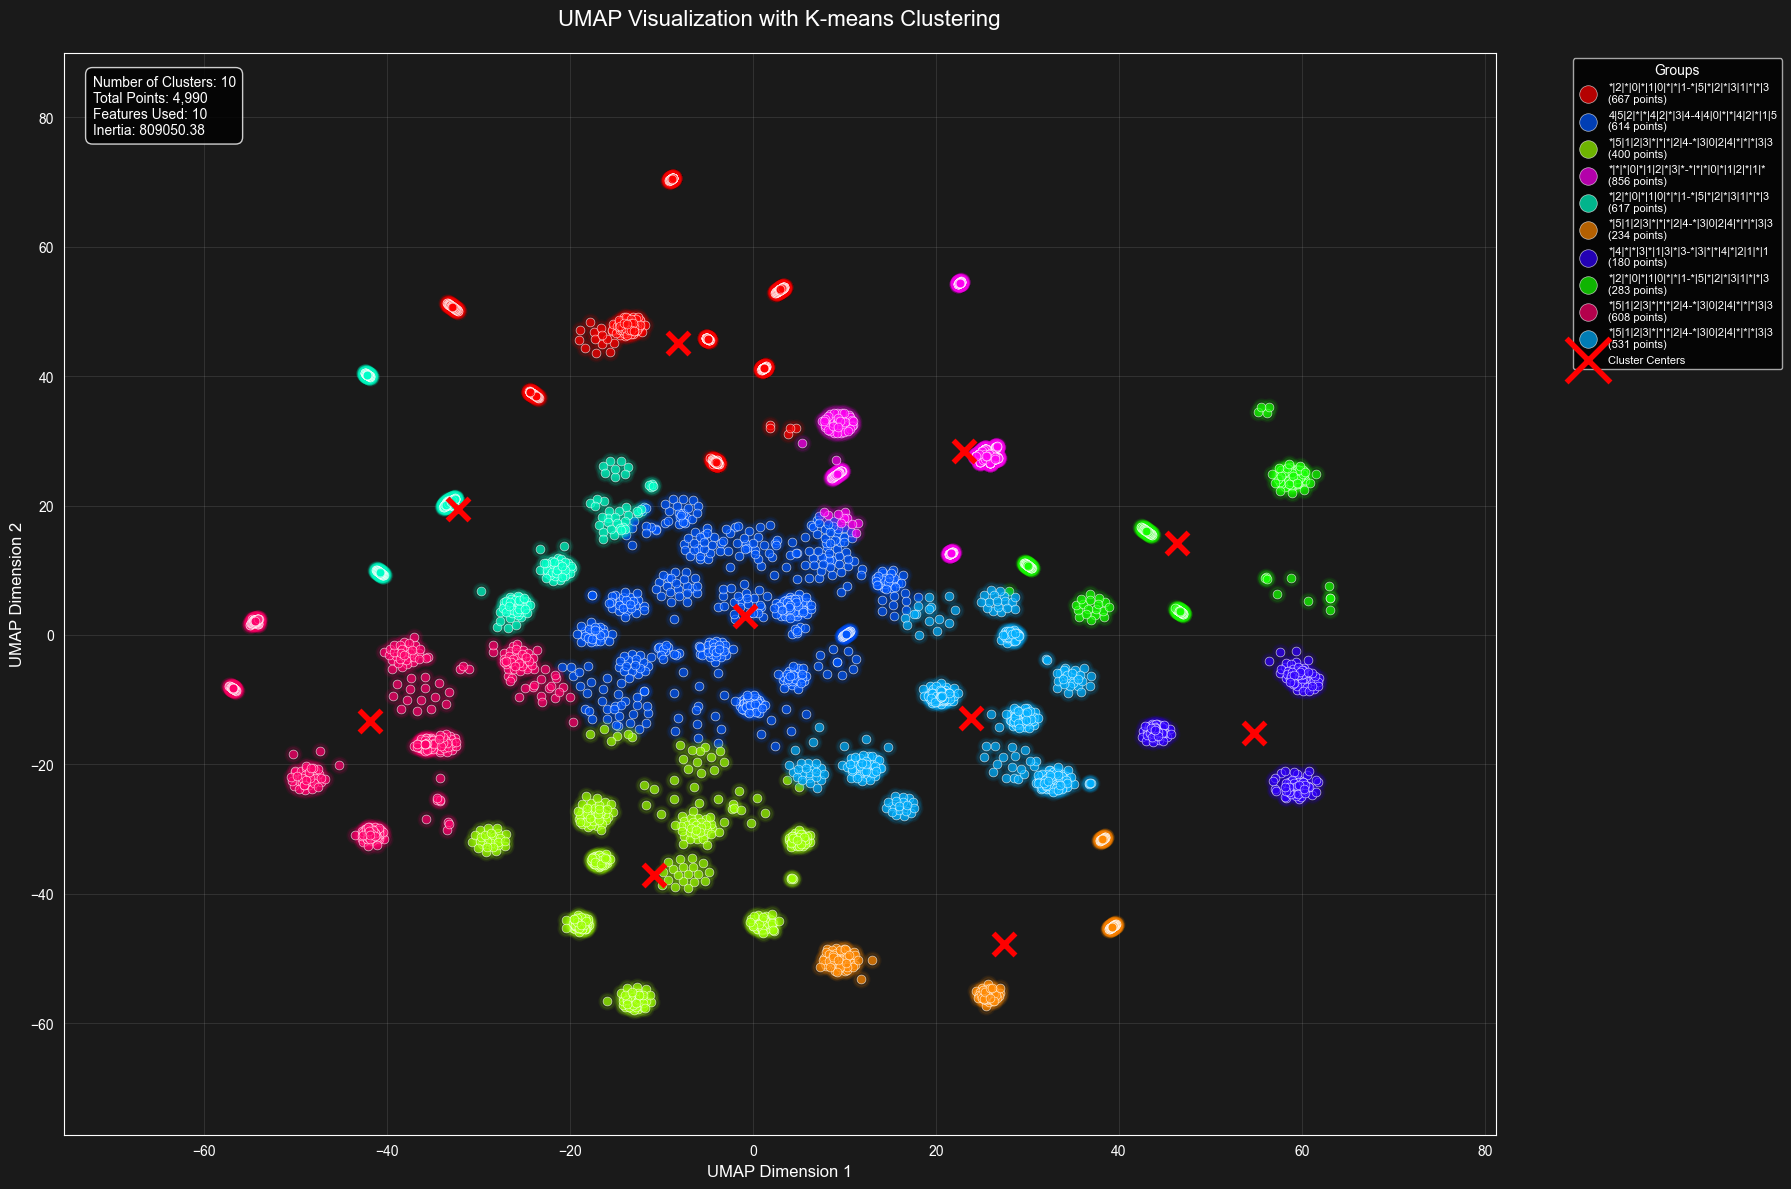

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Prepare the data
X_cols = []
for feat in feature_cols:
    X_cols.extend([f'{feat}_1', f'{feat}_2'])
X = synth_combinations_df[X_cols].copy()

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Create UMAP embedding with adjusted parameters for better separation
umap = UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=max(30, n_neighbors),  # Increased for more global structure
    min_dist=0.1,  # Increased for more separation
    metric='euclidean',
    densmap=True,
    n_epochs=1000,  # Increased for better convergence
    spread=1.0,  # Increased for more spread
    local_connectivity=2,
    repulsion_strength=5.0  # Increased repulsion between points
)

embedding = umap.fit_transform(X_scaled)

# Apply K-means clustering with increased separation
n_clusters = len(synth_combinations_df['group_key'].unique())
kmeans = KMeans(
    n_clusters=n_clusters, 
    random_state=42, 
    n_init=20,  # Increased number of initializations
    max_iter=500  # Increased maximum iterations
)
cluster_labels = kmeans.fit_predict(embedding)

# Map clusters to most common group_key in each cluster
cluster_to_group_mapping = {}
for cluster_id in range(n_clusters):
    cluster_mask = cluster_labels == cluster_id
    cluster_groups = synth_combinations_df.loc[cluster_mask, 'group_key']
    most_common_group = Counter(cluster_groups).most_common(1)[0][0]
    cluster_to_group_mapping[cluster_id] = most_common_group

# Setup plot with increased figure size
plt.figure(figsize=(18, 12))  # Increased figure size
plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor('#1a1a1a')
plt.gcf().set_facecolor('#1a1a1a')

# Generate colors for clusters
colors = generate_distinct_colors(n_clusters)

# Calculate cluster sizes
cluster_sizes = np.bincount(cluster_labels)

# Add buffer space around the plot
embedding_buffer = 0.15  # 15% buffer
x_min, x_max = embedding[:, 0].min(), embedding[:, 0].max()
y_min, y_max = embedding[:, 1].min(), embedding[:, 1].max()
x_buffer = (x_max - x_min) * embedding_buffer
y_buffer = (y_max - y_min) * embedding_buffer
plt.xlim(x_min - x_buffer, x_max + x_buffer)
plt.ylim(y_min - y_buffer, y_max + y_buffer)

# Plot each cluster with increased spacing
for cluster_id in range(n_clusters):
    mask = cluster_labels == cluster_id
    cluster_embedding = embedding[mask]
    group_key = cluster_to_group_mapping[cluster_id]
    
    # Add enhanced glow effect
    for size, alpha in [(150, 0.05), (100, 0.1)]:  # Multiple layers of glow
        plt.scatter(
            cluster_embedding[:, 0],
            cluster_embedding[:, 1],
            c=[colors[cluster_id]],
            s=size,
            alpha=alpha,
            label=None
        )
    
    # Main points with slightly smaller size for better separation
    plt.scatter(
        cluster_embedding[:, 0],
        cluster_embedding[:, 1],
        c=[colors[cluster_id]],
        label=f'{group_key}\n({cluster_sizes[cluster_id]} points)',
        alpha=0.7,
        s=40,  # Reduced point size
        edgecolor='white',
        linewidth=0.5
    )

# Plot cluster centers with enhanced visibility
cluster_centers = kmeans.cluster_centers_
plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    c='red',
    marker='x',
    s=250,  # Increased size
    linewidth=4,
    label='Cluster Centers'
)

# Add title and labels
plt.title('UMAP Visualization with K-means Clustering',
          fontsize=16, color='white', pad=20)
plt.xlabel('UMAP Dimension 1', fontsize=12, color='white')
plt.ylabel('UMAP Dimension 2', fontsize=12, color='white')

# Add enhanced stats
stats_text = (
    f'Number of Clusters: {n_clusters}\n'
    f'Total Points: {len(synth_combinations_df):,}\n'
    f'Features Used: {len(feature_cols)}\n'
    f'Inertia: {kmeans.inertia_:.2f}'
)
plt.text(
    0.02, 0.98,
    stats_text,
    transform=plt.gca().transAxes,
    bbox=dict(
        facecolor='black',
        alpha=0.8,
        edgecolor='white',
        boxstyle='round,pad=0.5'
    ),
    color='white',
    verticalalignment='top',
    fontsize=10
)

# Add legend with better spacing
if n_clusters > 20:
    top_clusters = np.argsort(cluster_sizes)[-20:]
    handles, labels = plt.gca().get_legend_handles_labels()
    handle_dict = dict(zip(labels, handles))
    selected_labels = [f'{cluster_to_group_mapping[i]}\n({cluster_sizes[i]} points)' for i in top_clusters]
    selected_handles = [handle_dict[f'{cluster_to_group_mapping[i]}\n({cluster_sizes[i]} points)'] for i in top_clusters]
    selected_labels.append('Cluster Centers')
    selected_handles.append(handle_dict['Cluster Centers'])
    plt.legend(
        selected_handles,
        selected_labels,
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        title='Top 20 Groups',
        fontsize=8,
        markerscale=2  # Increased marker size in legend
    )
else:
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        title='Groups',
        fontsize=8,
        markerscale=2
    )

plt.grid(True, alpha=0.1)
plt.tight_layout()

# Add cluster assignments and mapped group keys to the original dataframe
synth_combinations_df['kmeans_cluster'] = cluster_labels
synth_combinations_df['kmeans_mapped_group'] = [cluster_to_group_mapping[c] for c in cluster_labels]

# Print clustering quality metrics
print("\nClustering Quality Metrics:")
print(f"Number of points where assigned cluster group matches original group: "
      f"{(synth_combinations_df['group_key'] == synth_combinations_df['kmeans_mapped_group']).sum()}")
print(f"Clustering accuracy: "
      f"{(synth_combinations_df['group_key'] == synth_combinations_df['kmeans_mapped_group']).mean():.2%}")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import plotly.graph_objects as go
from typing import List, Dict, Any


def generate_distinct_colors(n: int) -> List[str]:
    colors = []
    for i in range(n):
        hue = i * 0.618033988749895 % 1
        saturation = 0.7 + np.random.random() * 0.3
        value = 0.8 + np.random.random() * 0.2
        rgb = plt.cm.hsv(hue)[:3]  # Convert to RGB
        hex_color = '#{:02x}{:02x}{:02x}'.format(
            int(rgb[0] * 255),
            int(rgb[1] * 255),
            int(rgb[2] * 255)
        )
        colors.append(hex_color)
    return colors


def prepare_feature_combinations(df: pd.DataFrame, group_key_col: str, feature_cols: List[str]) -> pd.DataFrame:
    """
    Create all possible combinations of individuals within groups
    
    Args:
        df (pd.DataFrame): Input dataframe
        group_key_col (str): Column name containing group identifiers
        feature_cols (List[str]): List of feature column names
        
    Returns:
        pd.DataFrame: Dataframe containing all combinations
    """
    all_combinations = []

    for group_key in df[group_key_col].unique():
        group_data = df[df[group_key_col] == group_key]
        unique_individuals = group_data[feature_cols].drop_duplicates().values

        if len(unique_individuals) < 2:
            continue

        pairs = list(combinations(range(len(unique_individuals)), 2))

        for i, j in pairs:
            combination = {
                group_key_col: group_key,
                'couple_key': f"{group_key}_pair_{i}_{j}"
            }

            for idx, feat in enumerate(feature_cols):
                combination[f'{feat}_1'] = unique_individuals[i][idx]
                combination[f'{feat}_2'] = unique_individuals[j][idx]

            all_combinations.append(combination)

    return pd.DataFrame(all_combinations)


def prepare_result_combinations(df: pd.DataFrame, feature_cols: List[str]) -> pd.DataFrame:
    all_combinations = []

    for couple_key in df['couple_key'].unique():
        indivs = couple_key.split('-')
        couple_data = df[df['indv_key'].isin(indivs)]

        if couple_data.shape[0] == 2:
            continue

        is_part_of_group = couple_data['is_couple_part_of_a_group'].iloc[0] != '0'
        unique_individuals = couple_data[feature_cols].drop_duplicates().values
        pairs = list(combinations(range(len(unique_individuals)), 2))

        for i, j in pairs:
            combination = {
                'couple_key': couple_key,
                'pair_id': f"{couple_key}_pair_{i}_{j}",
                'is_part_of_group': is_part_of_group
            }

            for idx, feat in enumerate(feature_cols):
                combination[f'{feat}_1'] = unique_individuals[i][idx]
                combination[f'{feat}_2'] = unique_individuals[j][idx]

            all_combinations.append(combination)

    return pd.DataFrame(all_combinations)

# Create combinations

In [20]:
feature_cols = list(filter(lambda x: 'Attr' in x, df_synth.columns))
feature_cols

['Attr1_X',
 'Attr2_X',
 'Attr3_X',
 'Attr4_X',
 'Attr5_X',
 'Attr1_T',
 'Attr2_T',
 'Attr3_T',
 'Attr4_T',
 'Attr5_T']

In [21]:
synth_combinations_df = DiscriminationData.generate_individual_synth_combinations(df_synth)
result_combinations_df = prepare_result_combinations(df_result, feature_cols)

In [22]:
synth_combinations_df.head()

,group_key,subgroup1_key,subgroup2_key,indv_key_1,indv_key_2,couple_key,Attr1_X_1,Attr1_X_2,Attr2_X_1,Attr2_X_2,...,Attr1_T_1,Attr1_T_2,Attr2_T_1,Attr2_T_2,Attr3_T_1,Attr3_T_2,Attr4_T_1,Attr4_T_2,Attr5_T_1,Attr5_T_2
0,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
1,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
2,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
3,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
4,*|*|*|0|*|*|*|*|1|*-*|*|*|1|*|*|*|*|2|*,*|*|*|0|*|*|*|*|1|*,*|*|*|1|*|*|*|*|2|*,0|0|0|0|0|0|0|0|1|0,0|0|0|1|0|0|0|0|2|0,0|0|0|0|0|0|0|0|1|0-0|0|0|1|0|0|0|0|2|0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0


In [23]:
result_combinations_df.head()

,couple_key,pair_id,is_part_of_group,Attr1_X_1,Attr1_X_2,Attr2_X_1,Attr2_X_2,Attr3_X_1,Attr3_X_2,Attr4_X_1,...,Attr1_T_1,Attr1_T_2,Attr2_T_1,Attr2_T_2,Attr3_T_1,Attr3_T_2,Attr4_T_1,Attr4_T_2,Attr5_T_1,Attr5_T_2
0,0|0|0|0|2|0|0|4|0|1-0|0|1|0|2|0|0|4|0|1,0|0|0|0|2|0|0|4|0|1-0|0|1|0|2|0|0|4|0|1_pair_0_1,False,0,0,0,0,0,0,0,...,0,0,0,1,2,2,0,0,1,1
1,0|0|0|0|2|0|0|4|0|1-0|0|3|0|2|0|0|4|0|1,0|0|0|0|2|0|0|4|0|1-0|0|3|0|2|0|0|4|0|1_pair_0_1,False,0,0,0,0,0,0,0,...,0,0,0,3,2,2,0,0,1,1
2,0|0|0|1|2|3|1|0|3|5-0|0|2|1|2|3|1|0|3|5,0|0|0|1|2|3|1|0|3|5-0|0|2|1|2|3|1|0|3|5_pair_0_1,False,0,0,1,1,3,3,1,...,0,0,0,2,2,2,3,3,5,5
3,0|0|0|1|2|3|1|0|3|5-0|0|3|1|2|3|1|0|3|5,0|0|0|1|2|3|1|0|3|5-0|0|3|1|2|3|1|0|3|5_pair_0_1,False,0,0,1,1,3,3,1,...,0,0,0,3,2,2,3,3,5,5
4,0|0|0|2|3|1|0|4|2|0-0|0|1|2|3|1|0|4|2|0,0|0|0|2|3|1|0|4|2|0-0|0|1|2|3|1|0|4|2|0_pair_0_1,False,0,0,2,2,1,1,0,...,0,0,0,1,3,3,2,2,0,0


In [24]:
X_cols

['Attr1_X_1',
 'Attr1_X_2',
 'Attr2_X_1',
 'Attr2_X_2',
 'Attr3_X_1',
 'Attr3_X_2',
 'Attr4_X_1',
 'Attr4_X_2',
 'Attr5_X_1',
 'Attr5_X_2',
 'Attr1_T_1',
 'Attr1_T_2',
 'Attr2_T_1',
 'Attr2_T_2',
 'Attr3_T_1',
 'Attr3_T_2',
 'Attr4_T_1',
 'Attr4_T_2',
 'Attr5_T_1',
 'Attr5_T_2']

In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from typing import List, Dict, Tuple
import pandas as pd
import plotly.graph_objects as go

class ClusteringAnalysis:
    def __init__(self, 
                 n_clusters: int,
                 feature_cols: List[str],
                 random_state: int = 42):
        """
        Initialize the clustering analysis pipeline.
        
        Args:
            n_clusters: Number of clusters for K-means
            feature_cols: List of base feature column names
            random_state: Random seed for reproducibility
        """
        self.n_clusters = n_clusters
        self.feature_cols = feature_cols
        self.random_state = random_state
        
        # Initialize components
        self.scaler = StandardScaler()
        self.umap_model = UMAP(
            n_components=2,
            n_neighbors=30,
            min_dist=0.1,
            random_state=random_state,
            spread=1.0,
            repulsion_strength=5.0,
            n_epochs=1000
        )
        self.kmeans = KMeans(
            n_clusters=n_clusters,
            random_state=random_state,
            n_init=20,
            max_iter=500
        )
        
        # Storage for fitted attributes
        self.cluster_to_group_mapping = {}
        self.clustering_accuracy = 0.0

    def prepare_features(self, df: pd.DataFrame) -> np.ndarray:
        """Prepare and expand feature columns."""
        X_cols = []
        for feat in self.feature_cols:
            X_cols.extend([f'{feat}_1', f'{feat}_2'])
        return df[X_cols].values

    def fit(self, synth_df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
        """
        Fit the pipeline on synthetic data.
        
        Args:
            synth_df: DataFrame containing synthetic data with 'group_key' column
            
        Returns:
            Tuple of (UMAP embeddings, cluster labels)
        """
        # Prepare and scale features
        X_synth = self.prepare_features(synth_df)
        X_synth_scaled = self.scaler.fit_transform(X_synth)
        
        # Fit UMAP and transform
        synth_embedding = self.umap_model.fit_transform(X_synth_scaled)
        
        # Fit K-means and get cluster labels
        cluster_labels = self.kmeans.fit_predict(synth_embedding)
        
        # Map clusters to most common group_key
        for cluster_id in range(self.n_clusters):
            cluster_mask = cluster_labels == cluster_id
            cluster_groups = synth_df.loc[cluster_mask, 'group_key']
            most_common_group = Counter(cluster_groups).most_common(1)[0][0]
            self.cluster_to_group_mapping[cluster_id] = most_common_group
            
        # Calculate clustering accuracy
        self.clustering_accuracy = (synth_df['group_key'] == 
                                  [self.cluster_to_group_mapping[c] for c in cluster_labels]).mean()
        
        return synth_embedding, cluster_labels

    def transform(self, result_df: pd.DataFrame) -> np.ndarray:
        """Transform result data using fitted pipeline."""
        X_result = self.prepare_features(result_df)
        X_result_scaled = self.scaler.transform(X_result)
        return self.umap_model.transform(X_result_scaled)

    def generate_distinct_colors(self) -> List[str]:
        """Generate distinct colors for visualization."""
        import colorsys
        
        def hsv_to_hex(h, s, v):
            rgb = colorsys.hsv_to_rgb(h, s, v)
            return f'rgb({int(rgb[0]*255)}, {int(rgb[1]*255)}, {int(rgb[2]*255)})'
        
        colors = []
        golden_ratio = (1 + 5 ** 0.5) / 2
        for i in range(self.n_clusters):
            hue = (i * golden_ratio) % 1
            colors.append(hsv_to_hex(hue, 0.8, 0.8))
        return colors

    def visualize(self, 
                 synth_df: pd.DataFrame,
                 result_df: pd.DataFrame,
                 synth_embedding: np.ndarray,
                 result_embedding: np.ndarray,
                 cluster_labels: np.ndarray) -> go.Figure:
        """Generate interactive visualization of clustering results."""
        fig = go.Figure()
        
        # Set dark theme
        fig.update_layout(
            template="plotly_dark",
            plot_bgcolor='#1a1a1a',
            paper_bgcolor='#1a1a1a',
            title={
                'text': 'UMAP Visualization with K-means Clustering',
                'y': 0.95,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top',
                'font': {'size': 16}
            },
            width=1200,
            height=800
        )

        # Generate colors and get cluster sizes
        colors = self.generate_distinct_colors()
        cluster_sizes = np.bincount(cluster_labels)

        # Plot synthetic data clusters
        for cluster_id in range(self.n_clusters):
            mask = cluster_labels == cluster_id
            cluster_embedding = synth_embedding[mask]
            group_key = self.cluster_to_group_mapping[cluster_id]

            fig.add_trace(go.Scatter(
                x=cluster_embedding[:, 0],
                y=cluster_embedding[:, 1],
                mode='markers',
                name=f'{group_key} ({cluster_sizes[cluster_id]} points)',
                marker=dict(
                    color=colors[cluster_id],
                    size=20,
                    opacity=0.7,
                    line=dict(color='white', width=0.5)
                ),
                hovertemplate=(
                    f"Group: {group_key}<br>" +
                    "Couple ID: %{customdata[2]}<br>" +
                    "x: %{x:.2f}<br>" +
                    "y: %{y:.2f}<br>" +
                    "<extra></extra>"
                ),
                customdata=list(zip(
                    [cluster_id] * sum(mask),
                    synth_df[mask]['group_key'],
                    synth_df[mask]['couple_key']
                ))
            ))

        # Plot cluster centers
        cluster_centers = self.kmeans.cluster_centers_
        fig.add_trace(go.Scatter(
            x=cluster_centers[:, 0],
            y=cluster_centers[:, 1],
            mode='markers',
            name='Cluster Centers',
            marker=dict(
                color='red',
                symbol='x',
                size=20,
                line=dict(width=2)
            ),
            hovertemplate=(
                "Cluster Center %{customdata}<br>" +
                "Group: %{text}<br>" +
                "x: %{x:.2f}<br>" +
                "y: %{y:.2f}<br>" +
                "<extra></extra>"
            ),
            customdata=list(range(self.n_clusters)),
            text=[self.cluster_to_group_mapping[i] for i in range(self.n_clusters)]
        ))

        # Plot result data
        if 'is_part_of_group' in result_df.columns:
            group_mask = result_df['is_part_of_group']
            non_group_mask = ~group_mask

            # Results in groups
            fig.add_trace(go.Scatter(
                x=result_embedding[group_mask, 0],
                y=result_embedding[group_mask, 1],
                mode='markers',
                name='Results (In Group)',
                marker=dict(
                    color='lime',
                    symbol='circle',
                    size=7,
                    line=dict(color='white', width=0.5)
                ),
                hovertemplate=(
                    "Couple Key: %{customdata}<br>" +
                    "x: %{x:.2f}<br>" +
                    "y: %{y:.2f}<br>" +
                    "<extra></extra>"
                ),
                customdata=result_df[group_mask]['couple_key']
            ))

            # Results not in groups
            fig.add_trace(go.Scatter(
                x=result_embedding[non_group_mask, 0],
                y=result_embedding[non_group_mask, 1],
                mode='markers',
                name='Results (Not in Group)',
                marker=dict(
                    color='red',
                    symbol='circle',
                    size=7,
                    line=dict(color='white', width=0.5)
                ),
                hovertemplate=(
                    "Couple Key: %{customdata}<br>" +
                    "x: %{x:.2f}<br>" +
                    "y: %{y:.2f}<br>" +
                    "<extra></extra>"
                ),
                customdata=result_df[non_group_mask]['couple_key']
            ))

        # Update layout
        fig.update_layout(
            xaxis_title="UMAP Dimension 1",
            yaxis_title="UMAP Dimension 2",
            showlegend=True,
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=1.05,
                title="Groups",
                font=dict(size=8)
            ),
            margin=dict(r=200)
        )

        # Add stats annotation
        stats_text = (
            f'Total Clusters: {self.n_clusters}<br>' +
            f'Total Synthetic Points: {len(synth_df):,}<br>' +
            f'Total Result Points: {len(result_df):,}<br>' +
            f'Features Used: {len(self.feature_cols)}<br>' +
            f'Clustering Accuracy: {self.clustering_accuracy:.2%}<br>' +
            f'Inertia: {self.kmeans.inertia_:.2f}'
        )

        fig.add_annotation(
            x=0.02,
            y=0.98,
            xref="paper",
            yref="paper",
            text=stats_text,
            showarrow=False,
            font=dict(color="white", size=10),
            align="left",
            bgcolor="rgba(0,0,0,0.8)",
            bordercolor="white",
            borderwidth=1,
            borderpad=5,
            opacity=0.8
        )

        return fig

In [34]:
# Initialize the analyzer
analyzer = ClusteringAnalysis(
    n_clusters=len(synth_combinations_df['group_key'].unique()),
    feature_cols=feature_cols
)

# Fit on synthetic data
synth_embedding, cluster_labels = analyzer.fit(synth_combinations_df)

# Transform result data
result_embedding = analyzer.transform(result_combinations_df)

# Generate visualization
fig = analyzer.visualize(
    synth_combinations_df,
    result_combinations_df,
    synth_embedding,
    result_embedding,
    cluster_labels
)

# Show the plot
fig.show()